## Centrality Dependence of CNM Effects

### Setup, Import & Preprocess

In [33]:
# --- setup (nPDF only) ---
import os, sys, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from pathlib import Path
sys.path.append("./npdf_code")

In [34]:
from npdf_data   import NPDFSystem, RpAAnalysis, centers_to_left_edges
from gluon_ratio import EPPS21Ratio, GluonEPPSProvider
from glauber     import OpticalGlauber, SystemSpec

In [35]:
# energies & σ_NN (mb)
SQRTS   = { "5.02": 5023.0, "8.16": 8160.0 }
SIG_NN  = { "5.02": 67.0,   "8.16": 71.0 }
CENT_EDGES = [0,20,40,60,80,100]

In [19]:
# analysis windows (edit as needed)
Y_RANGES_THREE = [(-4.46,-2.96), (-1.37,0.43), (2.03,3.53)] 
PT_RANGE   = (0.0, 20.0)
PT_WINDOW = (1.5, 20)

In [36]:
# ----------------------- user knobs -----------------------
P5_DIR   = "./input/npdf/pPb5TeV"
P8_DIR   = "./input/npdf/pPb8TeV"
EPPS_DIR = "./input/npdf/nPDFs"
OUTDIR   = Path("./output-npdf-comparisons"); OUTDIR.mkdir(exist_ok=True)

# inelastic σ_NN (mb)
SIG_NN_MB = {"5.02": 67.2, "8.16": 71.0}

# centrality bins [%]
CENT_EDGES = [0,20,40,60,80,100]

# three y-windows (Backward, Mid, Forward)
Y_WINDOWS = [(-4.46,-2.96,"Backward"), (-1.37,0.43,"Mid"), (2.03,3.53,"Forward")]

# pT range to draw (for raw lines) and minimal pT accepted in averages
PT_RANGE  = (0.0, 20.0)
PT_FLOOR  = 1.5    # drop < 1.5 GeV from weighted averages (set 0.0 to disable)

# plotting
COL = {"5.02":"tab:blue", "8.16":"tab:red"}
LS  = {"5.02":"-", "8.16":"--"}
DPI = 150

plt.rcParams.update({"figure.dpi":DPI, "font.size":12})

In [37]:
# Build providers (use the same A and √sNN you’re analyzing)
epps5 = GluonEPPSProvider(EPPS21Ratio(A=208,  path="./input/npdf/nPDFs"),
                          sqrt_sNN_GeV=5023.0, m_state_GeV="charmonium",
                          y_sign_for_xA=-1)   # default: x_A ~ e^{-y}
epps8 = GluonEPPSProvider(EPPS21Ratio(A=208, path="./input/npdf/nPDFs"),
                          sqrt_sNN_GeV=8160.0, m_state_GeV="charmonium",
                          y_sign_for_xA=-1)

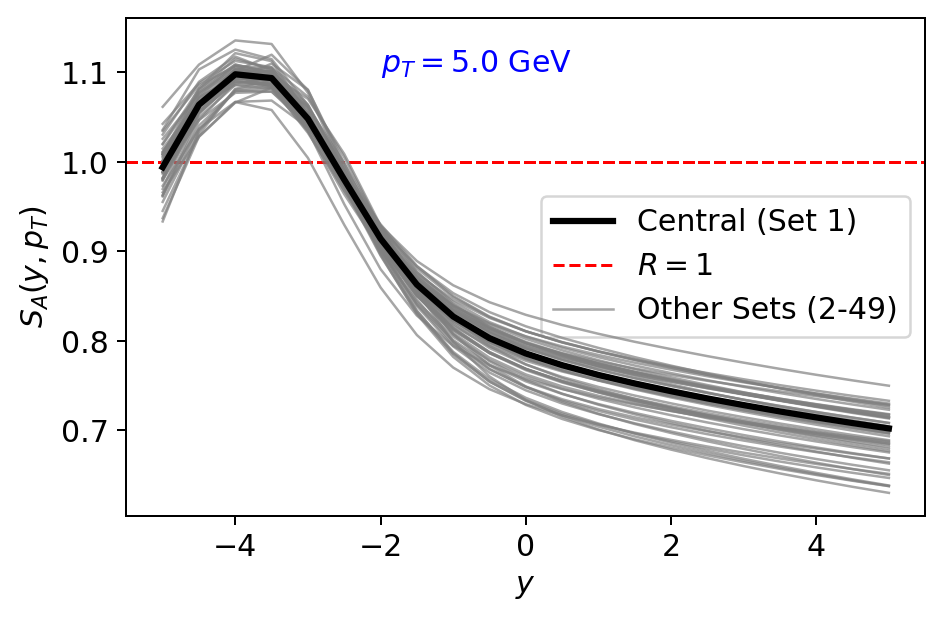

In [28]:
### Gluon Ratio S_A(y,pT)
# 1) Define variables
y = np.linspace(-5, 5, 21)
pt = 5.0

plt.figure(figsize=(5.4, 3.6), dpi=180)

# 4) Loop over all set_ids from 1 to 49
for i in range(1, 50):
    # Calculate SA for the current set_id
    SA = epps8.SA_ypt_set(y, np.full_like(y, pt), set_id=i)
    
    if i == 1:
        # Plot set 1 (Central) darker and thicker
        plt.plot(y, SA, lw=2.5, color='black', label="Central (Set 1)", zorder=50)
    else:
        # Plot other sets (2-49) lighter and thinner
        # Add a label only for the first "other" set (i=2) for the legend
        label = "Other Sets (2-49)" if i == 2 else None
        plt.plot(y, SA, lw=1, color='gray', alpha=0.7, label=label, zorder=10)
    plt.axhline(1.0, color='red', ls='--', lw=1.2, label=r"$R = 1$" if i == 1 else None)
# 5) Add labels and legend
plt.text(-2, 1.1, rf'$p_T = {pt}$ GeV', fontsize=12, color='blue')
plt.xlabel(r"$y$")
plt.ylabel(r"$S_{A}(y,p_T)$")
plt.legend(frameon=True)
plt.tight_layout()

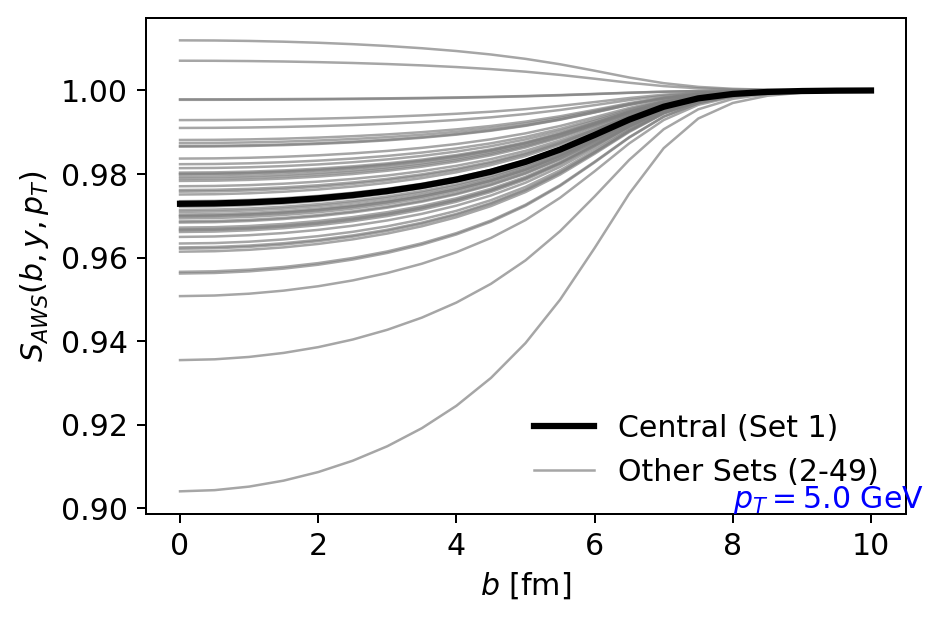

In [40]:
## 8 TeV
# 1) Define variables
b_list  = np.linspace(0,10, 21)
pT = 5.0
y = -2.5

plt.figure(figsize=(5.4, 3.6), dpi=180)

# 4) Loop over all set_ids from 1 to 49
for i in range(1, 50):
    # Calculate SAWS for the current set_id=i
    SAWS = np.array([epps8.SAWS_ypt_b_set(y, pT, b, set_id=i) for b in b_list])
    
    if i == 1:
        # Plot set 1 (Central) darker and thicker
        plt.plot(b_list, SAWS, lw=2.5, color='black', label="Central (Set 1)", zorder=50)
    else:
        # Plot other sets (2-49) lighter and thinner
        # Add a label only for the first "other" set (i=2) for the legend
        label = "Other Sets (2-49)" if i == 2 else None
        plt.plot(b_list, SAWS, lw=1, color='gray', alpha=0.7, label=label, zorder=10)
# 5) Add labels and legend
plt.text(8, 0.9, rf'$p_T = {pT}$ GeV', fontsize=12, color='blue')
plt.xlabel(r"$b$ [fm]")
plt.ylabel(r"$S_{AWS}(b,y,p_T)$")
plt.legend(frameon=False)
plt.tight_layout()

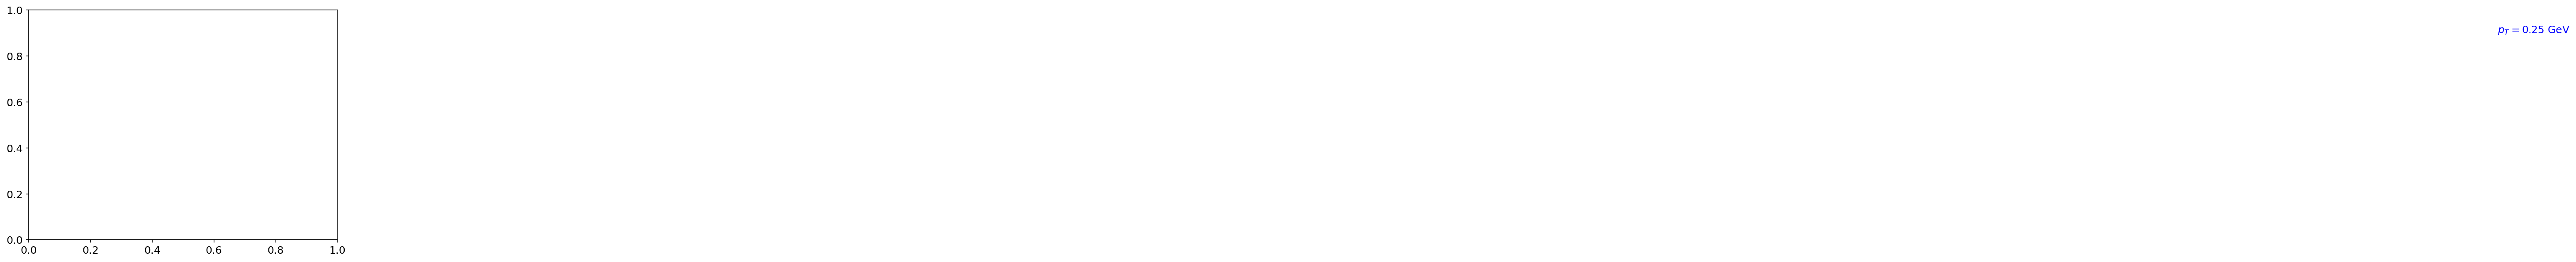

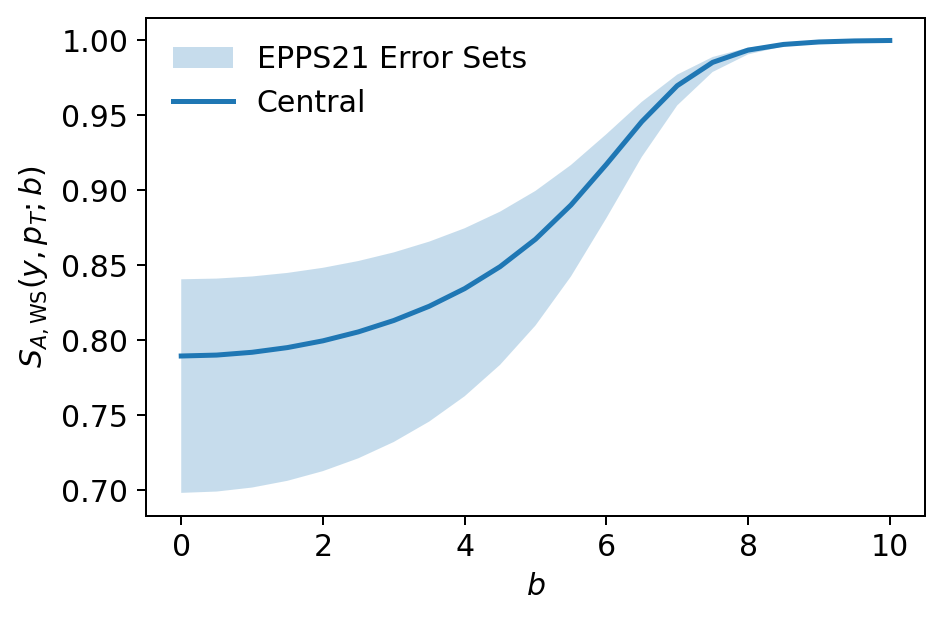

In [39]:
# # S_AWS(b; y, pT) vs b at fixed y, pT ---hessian band----
b_list  = np.linspace(0,10, 21)
pT = 0.25
y = -2.5
SAWS_c = np.array([epps8.SAWS_ypt_b_set(y, pT, b, set_id=1) for b in b_list])
band_list = [epps8.SAWS_band_ypt_b(y, pT, b, cl=68.0) for b in b_list]
SAWS_lo, SAWS_hi = np.array(band_list).T
plt.text(8, 0.9, rf'$p_T = {pT}$ GeV', fontsize=12, color='blue')
plt.figure(figsize=(5.4,3.6), dpi=180)
plt.fill_between(b_list, SAWS_lo, SAWS_hi, alpha=0.25, label="EPPS21 Error Sets")
plt.plot(b_list, SAWS_c, lw=2, label="Central")
plt.xlabel(r"$b$"); plt.ylabel(r"$S_{A,\mathrm{WS}}(y,p_T;b)$"); plt.legend(frameon=False); plt.tight_layout()

In [41]:
ana = RpAAnalysis()

In [45]:
sys5 = NPDFSystem.from_folder(P5_DIR, kick="pp", name="p+Pb 5.02 TeV")
r5   = ana.compute_rpa_grid(sys5.df_pp, sys5.df_pa, sys5.df_errors, pt_shift_min=0, shift_if_r_below=0.0, lowpt_policy="drop", join="intersect")
sys8 = NPDFSystem.from_folder(P8_DIR, kick="pp", name="p+Pb 8.16 TeV")
r8   = ana.compute_rpa_grid(sys8.df_pp, sys8.df_pa, sys8.df_errors, pt_shift_min=0, shift_if_r_below=0.0, lowpt_policy="drop", join="intersect")
systems = [("5.02", sys5, r5), ("8.16", sys8, r8)]

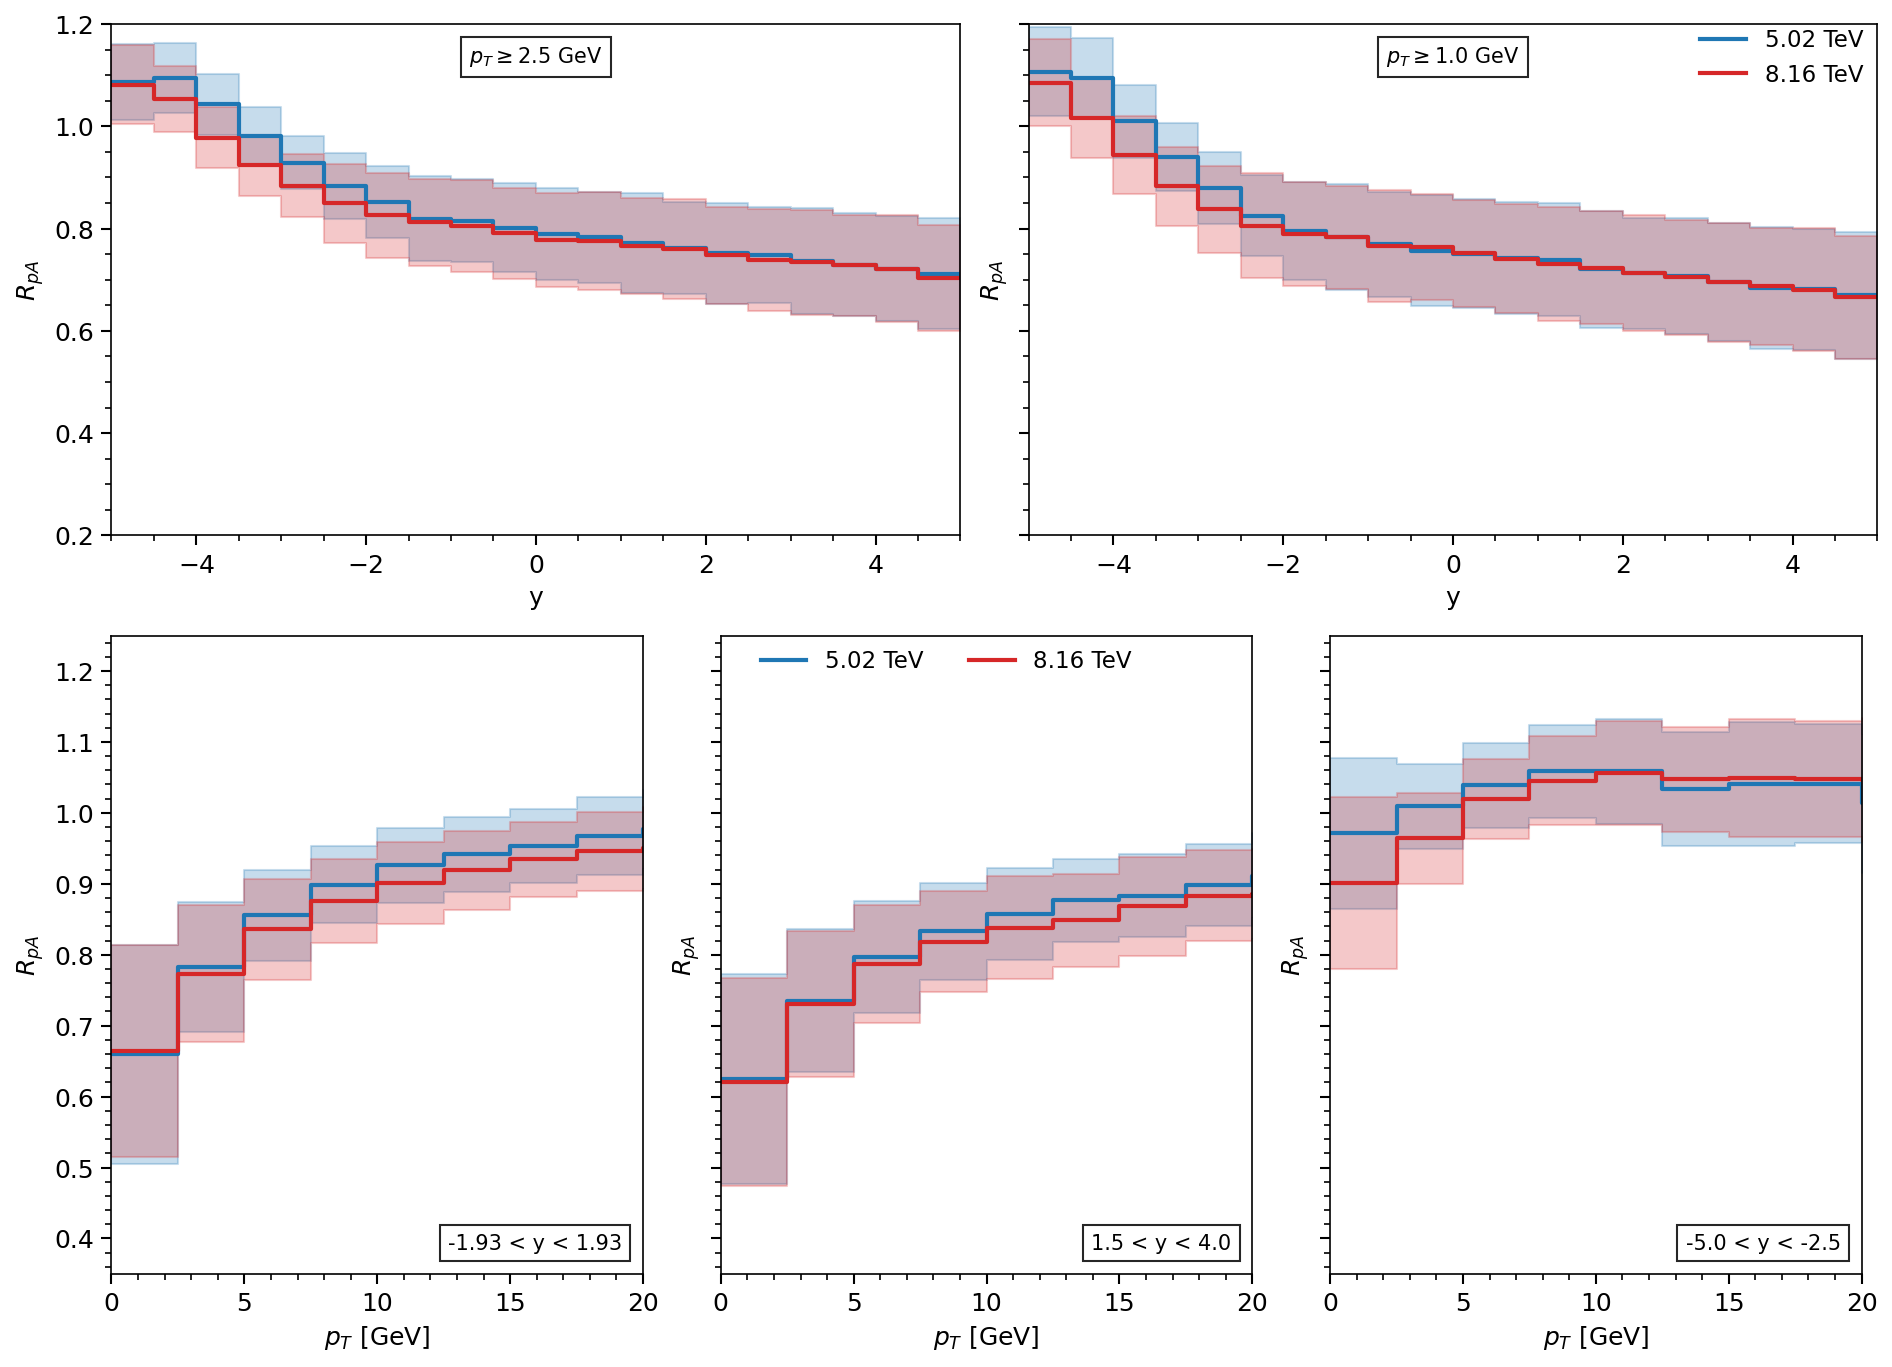

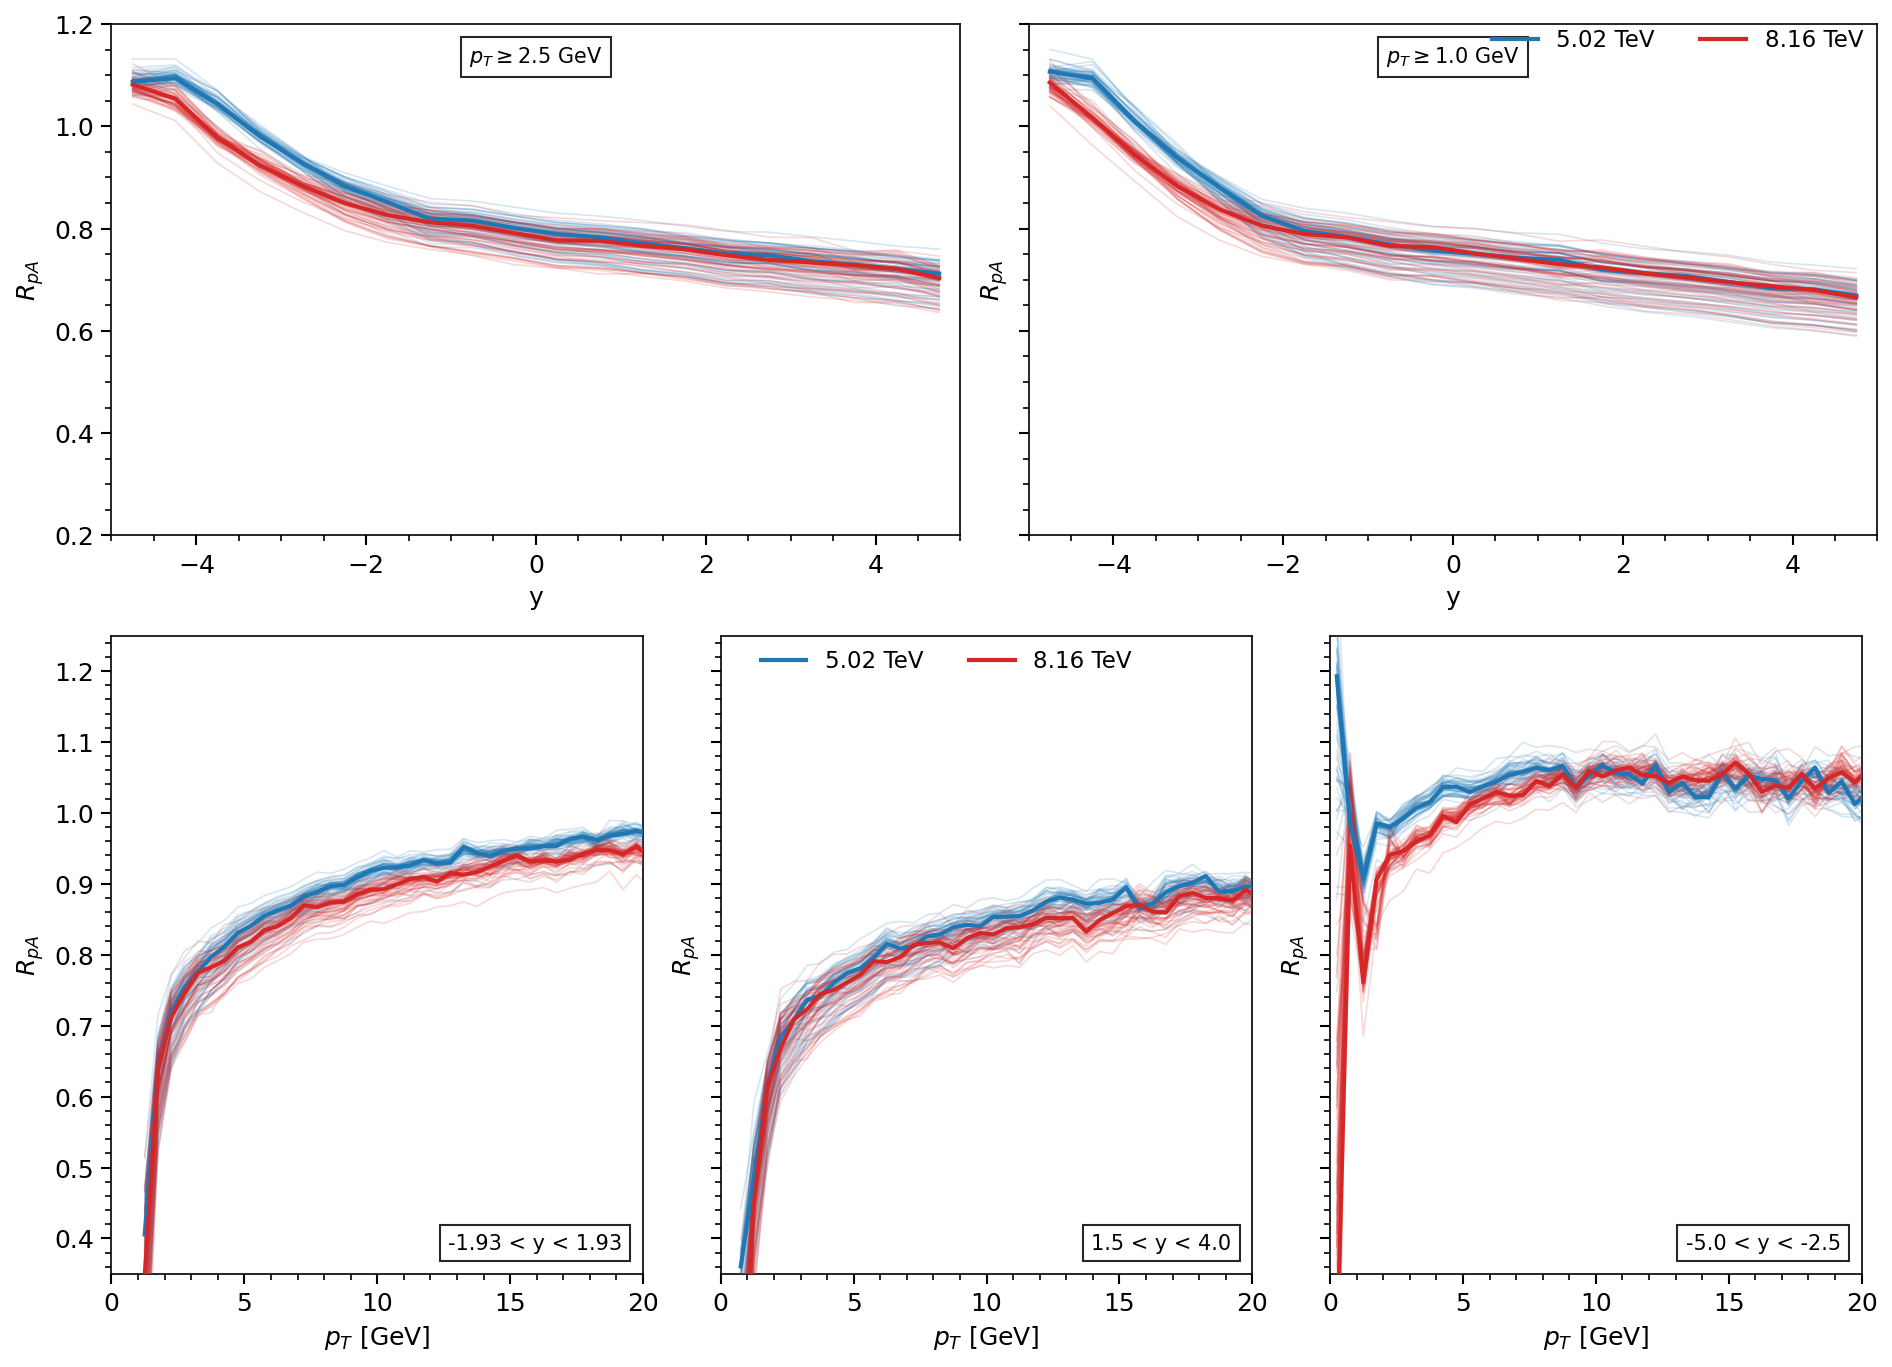

In [50]:
from npdf_data import step_band_xy, style_axes, note_box, step_band_from_left_edges
# ------- build results FIRST (for both energies), then plot -------
pairs = [("5.02", sys5, r5), ("8.16", sys8, r8)]
results = {}
for tag, sysX, rgrid in pairs:
    df_1p0 = ana.rpa_vs_y_pt_threshold(rgrid, sysX.df_pa, pt_min=1.0)
    df_2p5 = ana.rpa_vs_y_pt_threshold(rgrid, sysX.df_pa, pt_min=2.5)
    results[(tag, "1.0")] = (df_1p0, sysX)
    results[(tag, "2.5")] = (df_2p5, sysX)

def _x_edges(sysX, df):
    if getattr(sysX, "y_edges", None) is not None and len(sysX.y_edges) == len(df):
        return sysX.y_edges.values
    return centers_to_left_edges(df["y"].values)

# ---- Figure with subfigures: top = RpA vs y (two panels), bottom = RpA vs pT (three y-windows) ----
NOTE_LOC_Y  = "upper center"   # change to 'lower left', etc., as needed
NOTE_LOC_PT = "lower right"

y_panel_specs = [("2.5", r"$p_T \geq 2.5$ GeV"),
                ("1.0", r"$p_T \geq 1.0$ GeV")]

y_windows = [(-1.93, 1.93, "-1.93 < y < 1.93"),  
             ( 1.5,  4.0, "1.5 < y < 4.0"),
             (-5.0, -2.5, "-5.0 < y < -2.5")]

fig = plt.figure(figsize=(12.5, 9.0), constrained_layout=True)
sft, sfb = fig.subfigures(2, 1, height_ratios=[1.0, 1.2])

# Keep your colors mapping (already present)
colors = {"5.02": "tab:blue", "8.16": "tab:red"}

# ----- TOP subfigure: RpA vs y (2 panels) -----
axes_y = sft.subplots(1, 2, sharey=True)
for ax, (ptkey, note_text) in zip(axes_y, y_panel_specs):
    for tag in ["5.02", "8.16"]:
        df, sysX = results[(tag, ptkey)]
        x = _x_edges(sysX, df)
        step_band_xy(ax, x, df["r_central"], df["r_lo"], df["r_hi"],
                    label=f"{tag} TeV", color=colors[tag])   # ← color fixed
    style_axes(ax, "y", r"$R_{pA}$", grid=False)
    ax.set_ylim(0.2, 1.2)
    ax.set_xlim(-5.0, 5.0)
    note_box(ax, note_text, loc=NOTE_LOC_Y)

# One legend for the whole TOP subfigure
h_top, l_top = axes_y[0].get_legend_handles_labels()
sft.legend(h_top, l_top, loc="upper right", frameon=False, ncol=1, fontsize=11)


# ----- BOTTOM subfigure: RpA vs pT (3 y-windows) -----
axes_pt = sfb.subplots(1, len(y_windows), sharex=True, sharey=True)
if len(y_windows) == 1:
    axes_pt = [axes_pt]

for ax, (ymin, ymax, name) in zip(axes_pt, y_windows):
    for tag, sysX, rgrid in [("5.02", sys5, r5), ("8.16", sys8, r8)]:
        wide = ana.rpa_vs_pt_widebins(
            rgrid, sysX.df_pa, y_min=ymin, y_max=ymax, width=2.5
        )
        step_band_from_left_edges(ax, wide["pt_left"], wide["r_central"],
                                wide["r_lo"], wide["r_hi"],
                                label=f"{tag} TeV", color=colors[tag])  # ← color fixed
    style_axes(ax, r"$p_T$ [GeV]", r"$R_{pA}$", grid=False)
    ax.set_xlim(0, 20)
    ax.set_ylim(0.35, 1.25)
    note_box(ax, fr"{name}", loc=NOTE_LOC_PT)

# One legend for the whole BOTTOM subfigure
h_bot, l_bot = axes_pt[0].get_legend_handles_labels()
sfb.legend(h_bot, l_bot, loc="upper center", frameon=False, ncol=2, fontsize=11)

fig.savefig(f"{outdir}/rpa_y_pt_combined.pdf", bbox_inches="tight")
plt.show()

# --- helpers: raw per-member R_pA lines with faded error sets (NO bands) ---
def _plot_raw_members_vs_y(ax, sysX, pt_min, color, central_label, weight_mode="pa"):
    # common grid & members
    base, r0, M = ana.compute_rpa_members(sysX.df_pp, sysX.df_pa, sysX.df_errors, join="intersect", lowpt_policy="drop", pt_shift_min=0, shift_if_r_below=0.0)

    # weights aligned to base
    rgrid_min = base.copy()
    rgrid_min["r_central"] = r0
    wtab = RpAAnalysis._make_weight_table(rgrid_min, sysX.df_pa, df_pp=sysX.df_pp, mode=weight_mode)
    wfull = wtab["w"].to_numpy()

    yvals = np.sort(base["y"].unique())
    yb = base["y"].to_numpy()
    pb = base["pt"].to_numpy()

    # ---- central line
    ys_c, Rs_c = [], []
    for yy in yvals:
        m = (yb == yy) & (pb >= float(pt_min))
        if not np.any(m): 
            continue
        R = r0[m]
        w = wfull[m]
        g = (w > 0) & np.isfinite(R)
        if np.any(g):
            ys_c.append(float(yy))
            Rs_c.append(float(np.sum(R[g]*w[g]) / np.sum(w[g])))
    if len(ys_c) >= 2:
        ax.plot(ys_c, Rs_c, "-", linewidth=2.0, color=color, label=central_label, zorder=5)

    # ---- error-member lines (faded)
    if M.size:
        for j in range(M.shape[0]):
            ys_j, Rs_j = [], []
            for yy in yvals:
                m = (yb == yy) & (pb >= float(pt_min))
                if not np.any(m):
                    continue
                Rj = M[j, m]
                w  = wfull[m]
                g = (w > 0) & np.isfinite(Rj)
                if np.any(g):
                    ys_j.append(float(yy))
                    Rs_j.append(float(np.sum(Rj[g]*w[g]) / np.sum(w[g])))
            if len(ys_j) >= 2:
                ax.plot(ys_j, Rs_j, "-", linewidth=0.8, alpha=0.18, color=color, zorder=3)

def _plot_raw_members_vs_pt(ax, sysX, y_min, y_max, color, central_label, weight_mode="pa"):
    # common grid & members (aligned base order)
    base, r0, M = ana.compute_rpa_members(sysX.df_pp, sysX.df_pa, sysX.df_errors, join="intersect",pt_shift_min=0, shift_if_r_below=0.0)

    rgrid_min = base.copy()
    rgrid_min["r_central"] = r0
    wtab = RpAAnalysis._make_weight_table(rgrid_min, sysX.df_pa, df_pp=sysX.df_pp, mode=weight_mode)
    w_full = base.merge(wtab, on=["y","pt"], how="left")["w"].to_numpy()

    yb = base["y"].to_numpy(); pb = base["pt"].to_numpy()
    mY = (yb >= float(y_min)) & (yb <= float(y_max))
    pts = np.sort(np.unique(pb[mY]))

    # central line
    Rc = []
    for p in pts:
        m = mY & (pb == p)
        if not np.any(m):
            Rc.append(np.nan); continue
        R = r0[m]; w = w_full[m]
        g = (w > 0) & np.isfinite(R)
        Rc.append(float(np.sum(R[g]*w[g]) / np.sum(w[g])) if np.any(g) else np.nan)
    ax.plot(pts, Rc, "-", linewidth=2.0, color=color, label=central_label, zorder=5)

    # members → individual thin lines (faded)
    if M.size:
        for j in range(M.shape[0]):
            Rj_all = []
            for p in pts:
                m = mY & (pb == p)
                if not np.any(m):
                    Rj_all.append(np.nan); continue
                Rj = M[j, m]; w = w_full[m]
                g = (w > 0) & np.isfinite(Rj)
                Rj_all.append(float(np.sum(Rj[g]*w[g]) / np.sum(w[g])) if np.any(g) else np.nan)
            ax.plot(pts, np.asarray(Rj_all, float), "-", linewidth=0.8, alpha=0.18, color=color, zorder=3)

# ===== EXTRA FIGURE (LINES): raw R_pA_mb_k vs y (top: pT thresholds) and vs pT (bottom: y-windows) =====
fig2 = plt.figure(figsize=(12.5, 9.0), constrained_layout=True)
sft2, sfb2 = fig2.subfigures(2, 1, height_ratios=[1.0, 1.2])

# --- TOP: vs y at two pT thresholds ---
axes2_y = sft2.subplots(1, 2, sharey=True)
for ax, (ptmin, note) in zip(
    axes2_y,
    [(2.5, r"$p_T \geq 2.5$ GeV"), (1.0, r"$p_T \geq 1.0$ GeV")]
):
    _plot_raw_members_vs_y(ax, sys5, ptmin, colors["5.02"], "5.02 TeV")
    _plot_raw_members_vs_y(ax, sys8, ptmin, colors["8.16"], "8.16 TeV")
    style_axes(ax, "y", r"$R_{pA}$", grid=False)
    ax.set_xlim(-5.0, 5.0)
    ax.set_ylim(0.2, 1.2)
    note_box(ax, note, loc="upper center")
# single legend for top
h2t, l2t = axes2_y[0].get_legend_handles_labels()
sft2.legend(h2t, l2t, loc="upper right", frameon=False, ncol=2, fontsize=11)

# --- BOTTOM: vs pT in three y-windows (all member lines) ---
y_windows = [(-1.93, 1.93, "-1.93 < y < 1.93"),
             ( 1.5 , 4.0 , "1.5 < y < 4.0"),
             (-5.0 , -2.5, "-5.0 < y < -2.5")]

axes2_pt = sfb2.subplots(1, len(y_windows), sharex=True, sharey=True)
if len(y_windows) == 1:
    axes2_pt = [axes2_pt]

for ax, (ymin, ymax, name) in zip(axes2_pt, y_windows):
    _plot_raw_members_vs_pt(ax, sys5, ymin, ymax, colors["5.02"], "5.02 TeV")
    _plot_raw_members_vs_pt(ax, sys8, ymin, ymax, colors["8.16"], "8.16 TeV")
    style_axes(ax, r"$p_T$ [GeV]", r"$R_{pA}$", grid=False)
    ax.set_xlim(0, 20)
    ax.set_ylim(0.35, 1.25)
    note_box(ax, fr"{name}", loc="lower right")
# single legend for bottom
h2b, l2b = axes2_pt[0].get_legend_handles_labels()
sfb2.legend(h2b, l2b, loc="upper center", frameon=False, ncol=2, fontsize=11)

fig2.savefig(f"{outdir}/rpa_raw_members_vs_y_ptpanels.pdf", bbox_inches="tight")
plt.show()

### Other Calcs

In [6]:
# ----------------- helpers: R0 and K anchors -----------------
def load_R0_sampler(sys_folder: str):
    """
    Build a sampler for min-bias R0^(k)(y,pT) = σ_pA^(k)/σ_pp aligned across sets.
    Handles either DataFrame or tuple return from RpAAnalysis.compute_rpa_grid.
    """
    ana = RpAAnalysis()
    sys = NPDFSystem.from_folder(sys_folder, kick="pp")

    # use intersect join to keep only common (y,pt) points across all sets
    rgrid = ana.compute_rpa_grid(sys.df_pp, sys.df_pa, sys.df_errors,
                                 join="intersect",
                                 lowpt_policy="drop",  # raw table may contain NaNs at tiny pT; drop for stability
                                 pt_shift_min=0, shift_if_r_below=0.0,
                                 include_members=True)

    # Build arrays: grid and members
    y = rgrid["y"].to_numpy(float)
    p = rgrid["pt"].to_numpy(float)
    r0 = rgrid["r_central"].to_numpy(float)
    # 48 nuclear error members in the order produced by npdf_data (already aligned)
    mem_cols = [c for c in rgrid.columns if c.startswith("r_mem_")]
    M = rgrid[mem_cols].to_numpy(float).T  # (48, N)
    # tack on central as the first row to obtain (49, N)
    RSETS = np.vstack([r0[None, :], M])

    def R0_at(yv, pv):
        # nearest neighbor on the discrete TopDrawer grid (fast & robust)
        yv = np.asarray(yv, float); pv = np.asarray(pv, float)
        idx = np.array([np.argmin((y-yy)**2 + (p-pp)**2) for yy,pp in zip(yv,pv)], int)
        return RSETS[:, idx]  # (49, len(yv))

    return dict(sys=sys, grid=(y, p), RSETS=RSETS, R0_at=R0_at)

In [7]:
def make_gluon_provider(sqrts_GeV: float):
    # Pb=208, charmonium default mass, x_A(y,pT) with A at negative rapidity ⇒ y_sign=-1
    epps = EPPS21Ratio(A=208, path=EPPS_DIR)
    prov = GluonEPPSProvider(epps, sqrt_sNN_GeV=sqrts_GeV, m_state_GeV="charmonium", y_sign_for_xA=-1)
    return prov.with_geometry(None)   # attach default WS and Nnorm

In [8]:
def alpha_bar_bins(energy_label: str):
    """⟨α⟩ per centrality bin from Optical Glauber with Tp⊗TA and your σ_NN."""
    roots = 5023.0 if energy_label=="5.02" else 8160.0
    spec  = SystemSpec(system="pA", roots_GeV=roots, A=208, sigma_nn_mb=SIG_NN_MB[energy_label])
    gl    = OpticalGlauber(spec, verbose=False)
    b, T  = gl.b_grid, gl.TpA_b
    T0    = float(T[0]) if T[0]>0 else 1.0
    sigma = SIG_NN_MB[energy_label] * 0.1
    w     = b*(1.0 - np.exp(-sigma*T))  # 2π cancels in ratio
    cdf   = gl.cum_pA

    out = []
    for L, R in zip(CENT_EDGES[:-1], CENT_EDGES[1:]):
        bL = np.interp(L/100.0, cdf, b); bR = np.interp(R/100.0, cdf, b)
        m  = (b>=bL)&(b<=bR)
        den = np.trapezoid(w[m], b[m])
        out.append(np.trapezoid((T[m]/T0)*w[m], b[m]) / max(den,1e-30))
    return np.array(out, float)

def K_anchors(provider, yv, pv):
    """Return K0 (b≈0) and Kfar (b≈12 fm) for all 49 sets at the given points."""
    K0  = K_sets_at_b(provider, 0.0, yv, pv)
    Kf  = K_sets_at_b(provider, 12.0, yv, pv)
    return K0, Kf

def K_sets_at_b(provider, b_fm, y_vec, pt_vec):
    y_vec = np.asarray(y_vec, float); pt_vec = np.asarray(pt_vec, float)
    out = np.empty((49, y_vec.size), float)
    for sid in range(1, 50):
        SA  = provider.SA_ypt_set( y_vec, pt_vec, set_id=sid, flav="g")
        SAW = provider.SAWS_ypt_b_set(y_vec, pt_vec, b_fm,  set_id=sid, flav="g")
        out[sid-1] = SAW / np.clip(SA, 1e-15, None)
    return out

def hessian_sym_48(members_48xN):
    """Symmetric 90%CL band from 24 eigenvector pairs (48 rows)."""
    M = np.asarray(members_48xN, float)
    # pairs: (0,1),(2,3),...,(46,47)
    d2 = np.zeros(M.shape[1], float)
    for i in range(0, M.shape[0], 2):
        d = M[i] - M[i+1]
        d2 += d*d
    return 0.5*np.sqrt(d2)   # 90% CL; divide by 1.645 later if you want 68% CL

In [9]:
# -------------------- build all ingredients --------------------
print("[load] nPDF min-bias R0(y,pT) samplers…")
S5 = load_R0_sampler(P5_DIR)
S8 = load_R0_sampler(P8_DIR)

print("[load] EPPS21 gluon providers (with WS)…")
prov5 = make_gluon_provider(5023.0)  # 5.02 TeV
prov8 = make_gluon_provider(8160.0)  # 8.16 TeV

print("[Glauber] alpha-bar per centrality bin…")
ABAR = {"5.02": alpha_bar_bins("5.02"),
        "8.16": alpha_bar_bins("8.16")}
CENT_MID = 0.5*(np.array(CENT_EDGES[:-1])+np.array(CENT_EDGES[1:]))

[load] nPDF min-bias R0(y,pT) samplers…
[load] EPPS21 gluon providers (with WS)…
[Glauber] alpha-bar per centrality bin…


[plot] 1) RpA vs centrality in three y-windows…


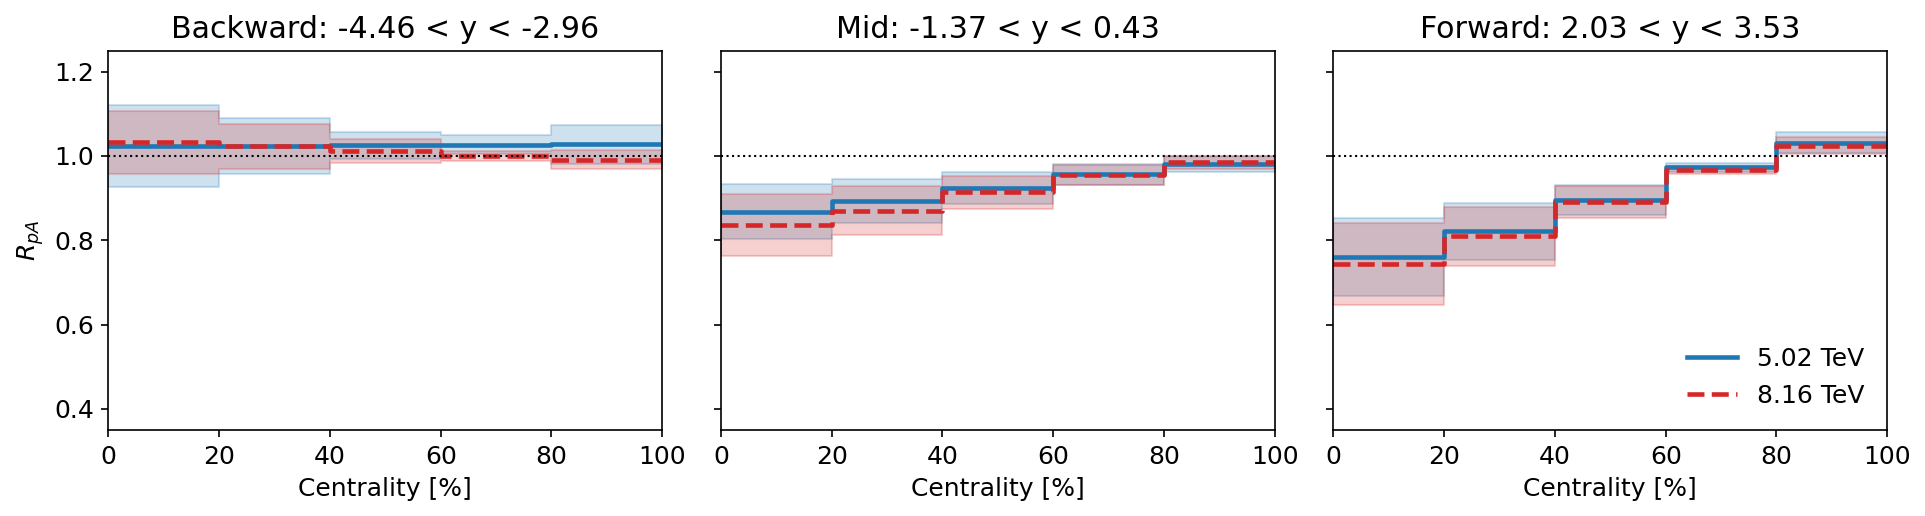

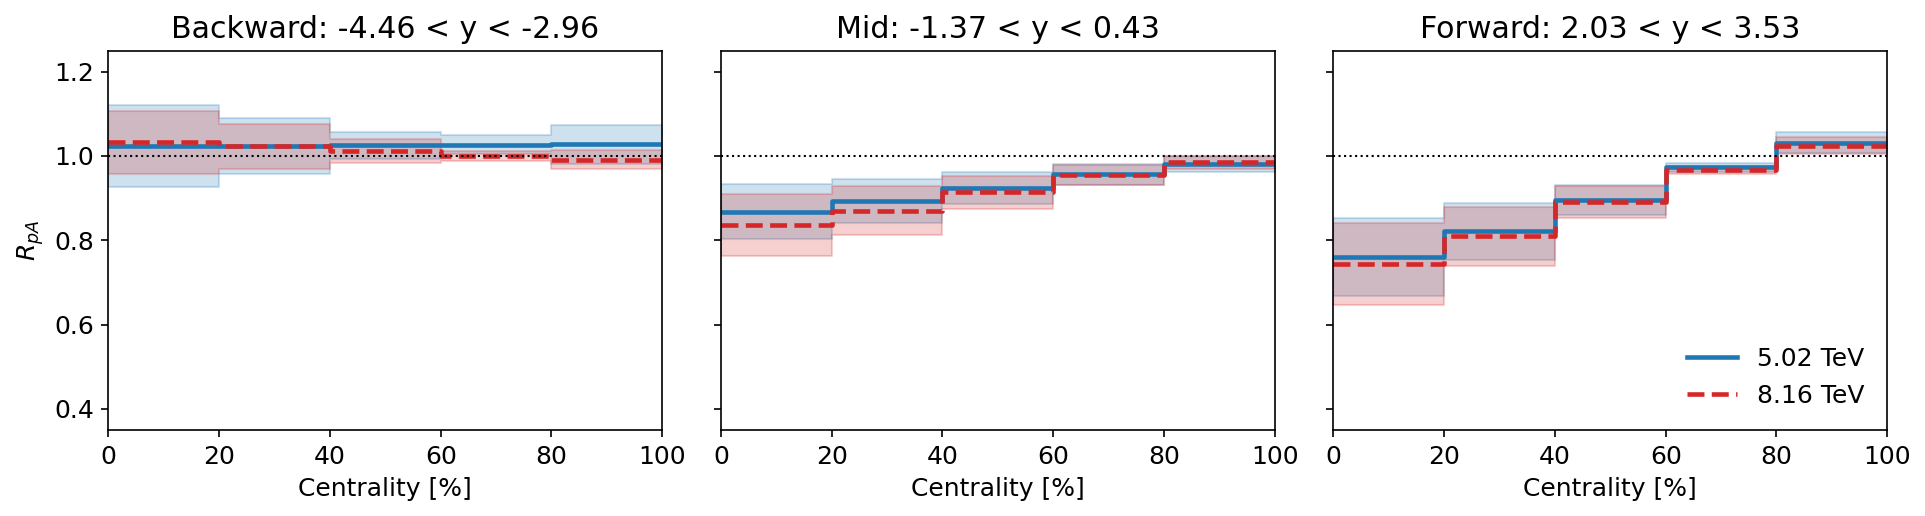

In [11]:
# ----------------------- run all plots -----------------------
# if __name__ == "__main__":
print("[plot] 1) RpA vs centrality in three y-windows…")
fig_rpa_vs_centrality()

[plot] 2) RpA vs y (subplots = centrality bins + min-bias)…


ValueError: (0, 100) is not in list

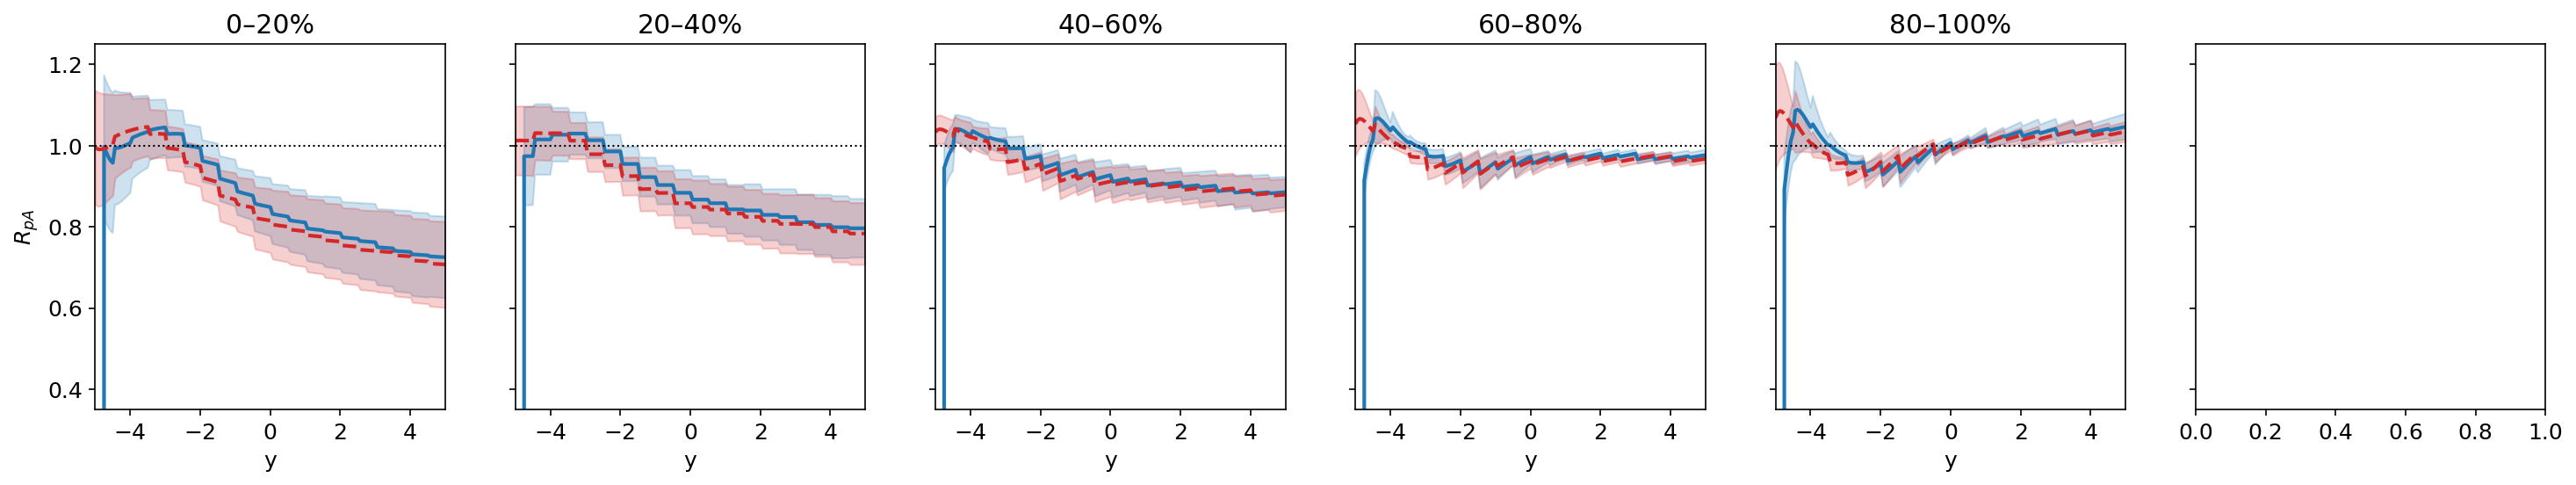

In [12]:
print("[plot] 2) RpA vs y (subplots = centrality bins + min-bias)…")
fig_rpa_vs_y_panels()

[plot] 3) RpA vs pT (three figures; each has subplots by centrality + min-bias)…


KeyboardInterrupt: 

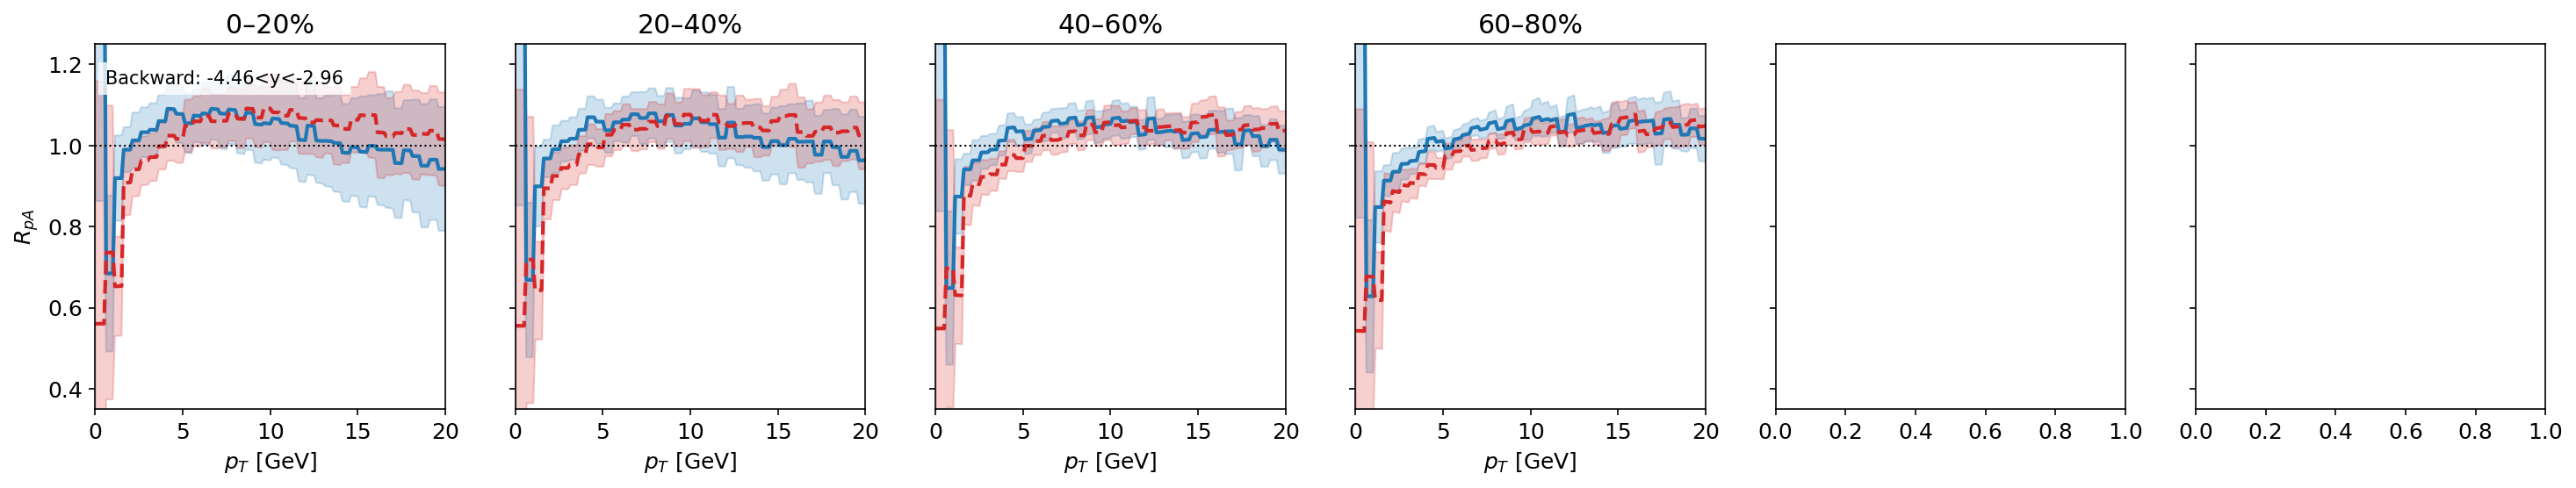

In [13]:
print("[plot] 3) RpA vs pT (three figures; each has subplots by centrality + min-bias)…")
figs_rpa_vs_pt_by_ywindow()

In [ ]:
print(f"[done] Figures saved under: {OUTDIR.resolve()}")

### TESTING FASTER

In [4]:
import hashlib, os, json, sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("./code")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import time
import pickle

# Your modules
from npdf_data import NPDFSystem, RpAAnalysis
from gluon_ratio import EPPS21Ratio, GluonEPPSProvider
from glauber import OpticalGlauber, SystemSpec

In [6]:
# ============================================================================
# SECTION 1: CONFIGURATION
# ============================================================================

# --- I/O paths ---
P5_DIR = "./input/npdf/pPb5TeV"
P8_DIR = "./input/npdf/pPb8TeV"
EPPS_DIR = "./input/npdf/nPDFs"
OUTDIR = Path("./output-npdf-centrality")
OUTDIR.mkdir(exist_ok=True)

# --- Physical parameters ---
SIG_NN_MB = {"5.02": 67.2, "8.16": 71.0}  # Inelastic σ_NN (mb)

# --- Analysis ranges (FLEXIBLE - edit as needed) ---
CENT_EDGES = [0, 20, 40, 60, 80, 100]  # Centrality bins (%)

# Three rapidity windows
Y_WINDOWS = [
    (-4.46, -2.96, "Backward"),
    (-1.37, 0.43, "Mid"),
    (2.03, 3.53, "Forward")
]

PT_RANGE = (0.0, 25.0)  # Full pT range for integration
PT_FLOOR = 0.0          # Minimum pT for averages (set 0 to include all)

# --- Grid resolution for (y,pT) integration ---
NY_GRID = 31   # Points in y for each window
NPT_GRID = 31  # Points in pT

# --- Plotting styles ---
COLORS = {"5.02": "tab:blue", "8.16": "tab:red"}
LINESTYLE = {"5.02": "--", "8.16": "-"}  # 5 TeV dashed, 8 TeV solid
DPI = 150

plt.rcParams.update({"figure.dpi": DPI, "font.size": 11})

In [7]:
# ============================================================================
# SECTION 2: CORE COMPUTATION FUNCTIONS
# ============================================================================

def load_R0_sampler(sys_folder: str, kick: str = "pp"):
    """
    Build fast nearest-neighbor sampler for R0^(k)(y,pT) aligned across 
    all 49 EPPS21 sets (1 central + 48 nuclear error members).
    
    Returns:
        dict with keys: 'sys', 'grid', 'RSETS', 'R0_at'
    """
    print(f"  Loading R0 sampler from {sys_folder}...")
    ana = RpAAnalysis()
    sys = NPDFSystem.from_folder(sys_folder, kick=kick)
    
    # Build aligned grid with all members
    rgrid = ana.compute_rpa_grid(
        sys.df_pp, sys.df_pa, sys.df_errors,
        join="intersect",
        lowpt_policy="drop",
        pt_shift_min=0,
        shift_if_r_below=0.0,
        include_members=True
    )
    
    y = rgrid["y"].to_numpy(float)
    p = rgrid["pt"].to_numpy(float)
    r0 = rgrid["r_central"].to_numpy(float)
    
    # Extract 48 member columns
    mem_cols = [c for c in rgrid.columns if c.startswith("r_mem_")]
    M = rgrid[mem_cols].to_numpy(float).T  # (48, N)
    
    # Stack central as first row → (49, N)
    RSETS = np.vstack([r0[None, :], M])
    
    def R0_at(yv, pv):
        """Nearest neighbor lookup on discrete grid."""
        yv = np.atleast_1d(yv).astype(float)
        pv = np.atleast_1d(pv).astype(float)
        idx = np.array([
            np.argmin((y - yy)**2 + (p - pp)**2) 
            for yy, pp in zip(yv, pv)
        ], int)
        return RSETS[:, idx]  # (49, len(yv))
    
    return {
        'sys': sys,
        'grid': (y, p),
        'RSETS': RSETS,
        'R0_at': R0_at
    }


def make_gluon_provider(sqrts_GeV: float, epps_dir: str):
    """
    Create GluonEPPSProvider with Woods-Saxon geometry.
    
    Physics:
        - A=208 (Pb), charmonium mass scale
        - y_sign=-1 (A at negative rapidity, standard pA convention)
    """
    epps = EPPS21Ratio(A=208, path=epps_dir)
    prov = GluonEPPSProvider(
        epps,
        sqrt_sNN_GeV=sqrts_GeV,
        m_state_GeV="charmonium",
        y_sign_for_xA=-1
    )
    return prov.with_geometry(None)  # Attach default WS


def compute_alpha_bar_bins(energy_label: str, cent_edges):
    """
    Compute ⟨α⟩ = ⟨T(b)/T(0)⟩ for each centrality bin using Optical Glauber.
    
    Physics:
        - Weight: w(b) ∝ 2πb[1 - exp(-σ_NN T(b))]  (inelastic)
        - Centrality edges inverted from CDF of w(b)
    
    Returns:
        np.ndarray of ⟨α⟩ values (one per bin)
    """
    print(f"  Computing ⟨α⟩ for {energy_label} TeV...")
    roots = 5023.0 if energy_label == "5.02" else 8160.0
    spec = SystemSpec(
        system="pA",
        roots_GeV=roots,
        A=208,
        sigma_nn_mb=SIG_NN_MB[energy_label]
    )
    gl = OpticalGlauber(spec, verbose=False)
    
    b = gl.b_grid
    # Thickness function via interpolation
    T = np.array([gl.TA_r(float(bi)) for bi in b], float)
    T0 = float(T[0])
    
    # Inelastic weight
    sigma = SIG_NN_MB[energy_label] * 0.1  # mb → fm²
    w = 2.0 * np.pi * b * (1.0 - np.exp(-sigma * T))
    
    # CDF for centrality mapping
    cdf = np.r_[0.0, np.cumsum(0.5 * (w[1:] + w[:-1]) * np.diff(b))]
    cdf /= cdf[-1] if cdf[-1] > 0 else 1.0
    
    def b_at_percentile(p):
        """Invert CDF to get b at percentile p ∈ [0,1]."""
        j = np.searchsorted(cdf, p, side="left")
        if j <= 0:
            return b[0]
        if j >= len(b):
            return b[-1]
        t = 0.0 if cdf[j] == cdf[j-1] else (p - cdf[j-1]) / (cdf[j] - cdf[j-1])
        return (1.0 - t) * b[j-1] + t * b[j]
    
    # Compute ⟨α⟩ for each bin
    abars = []
    for L, R in zip(cent_edges[:-1], cent_edges[1:]):
        bl = b_at_percentile(L / 100.0)
        br = b_at_percentile(R / 100.0)
        m = (b >= bl) & (b <= br)
        den = np.trapezoid(w[m], b[m])
        num = np.trapezoid((T[m] / T0) * w[m], b[m])
        abars.append(num / max(den, 1e-30))
    
    return np.array(abars, float)


def K_anchors(provider, yv, pv):
    """
    Compute K(b) anchors at b≈0 and b≈12 fm for all 49 EPPS21 sets.
    
    Physics:
        K(b) = S_A,WS(b) / S_A = affine in α(b)
        → Only need K_0 and K_∞ to interpolate entire curve!
    
    Returns:
        K0, Kf: each (49, N) arrays
    """
    yv = np.asarray(yv, float)
    pv = np.asarray(pv, float)
    
    K0 = np.empty((49, yv.size), float)
    Kf = np.empty((49, yv.size), float)
    
    for sid in range(1, 50):
        SA = provider.SA_ypt_set(yv, pv, set_id=sid, flav="g")
        SA0 = provider.SAWS_ypt_b_set(yv, pv, 0.0, set_id=sid, flav="g")
        SAf = provider.SAWS_ypt_b_set(yv, pv, 12.0, set_id=sid, flav="g")
        
        K0[sid-1] = SA0 / np.clip(SA, 1e-12, None)
        Kf[sid-1] = SAf / np.clip(SA, 1e-12, None)
    
    return K0, Kf


def hessian_sym_48(members_48xN):
    """
    Symmetric Hessian 90% CL band from 24 eigenvector pairs.
    
    Formula: Δ = (1/2)√[Σᵢ(Sᵢ⁺ - Sᵢ⁻)²]
    """
    M = np.asarray(members_48xN, float)
    d2 = np.zeros(M.shape[1], float)
    for i in range(0, M.shape[0], 2):
        d = M[i] - M[i+1]
        d2 += d * d
    return 0.5 * np.sqrt(d2)


# ============================================================================
# SECTION 3: MAIN ANALYSIS FUNCTIONS
# ============================================================================

def compute_rpa_vs_centrality(tag, y_window, pt_window, R0_sampler, provider, abar):
    """
    Compute R_pA vs centrality for one energy and one y-window.
    
    Returns:
        cent_centers: Centrality bin centers (%)
        Rsets: (49, Ncent) array - central + 48 members
    """
    R0f = R0_sampler["R0_at"]
    
    # Integration grid
    y_grid = np.linspace(y_window[0], y_window[1], NY_GRID)
    pt_grid = np.linspace(pt_window[0], pt_window[1], NPT_GRID)
    Y, PT = np.meshgrid(y_grid, pt_grid, indexing="ij")
    yv, pv = Y.ravel(), PT.ravel()
    
    # Get R0 and K anchors (vectorized)
    R0_all = R0f(yv, pv)           # (49, N)
    K0, Kf = K_anchors(provider, yv, pv)  # each (49, N)
    
    # Compute for each centrality bin
    out = []
    for a in abar:
        # Key formula: K(α) = K_∞ + (K_0 - K_∞)α
        Kbar = Kf + (K0 - Kf) * float(a)  # (49, N)
        
        # Average over (y,pT) window
        RpA = np.nanmean(R0_all * Kbar, axis=1)  # (49,)
        out.append(RpA)
    
    Rsets = np.stack(out, axis=1)  # (49, Ncent)
    cent_centers = 0.5 * (np.array(CENT_EDGES[:-1]) + np.array(CENT_EDGES[1:]))
    
    return cent_centers, Rsets


def compute_rpa_vs_y(tag, cent_bin, pt_window, R0_sampler, provider, abar_all):
    """
    Compute R_pA vs y for one centrality bin.
    
    Returns:
        ys: y values
        Rsets: (49, Ny) array
    """
    R0f = R0_sampler["R0_at"]
    
    # Get ⟨α⟩ for this bin
    idx = list(zip(CENT_EDGES[:-1], CENT_EDGES[1:])).index(cent_bin)
    a = float(abar_all[idx])
    
    # y scan
    ys = np.linspace(-5, 5, 161)
    Rc, members = [], []
    
    for yy in ys:
        pts = np.linspace(pt_window[0], pt_window[1], 31)
        yv = np.full_like(pts, yy)
        
        R0 = R0f(yv, pts)  # (49, Npt)
        K0, Kf = K_anchors(provider, yv, pts)
        
        RpA = np.nanmean(R0 * (Kf + (K0 - Kf) * a), axis=1)  # (49,)
        Rc.append(RpA[0])
        members.append(RpA[1:])
    
    Rsets = np.vstack([np.array(Rc)[None, :], 
                       np.stack(members, axis=1)])  # (49, Ny)
    
    return ys, Rsets


def compute_rpa_vs_pt(tag, cent_bin, y_window, R0_sampler, provider, abar_all):
    """
    Compute R_pA vs pT for one centrality bin and y-window.
    
    Returns:
        pts: pT values
        Rsets: (49, Npt) array
    """
    R0f = R0_sampler["R0_at"]
    
    # Get ⟨α⟩ for this bin
    idx = list(zip(CENT_EDGES[:-1], CENT_EDGES[1:])).index(cent_bin)
    a = float(abar_all[idx])
    
    # pT scan
    pts = np.linspace(PT_RANGE[0], PT_RANGE[1], 161)
    Rc, members = [], []
    
    for pp in pts:
        yv = np.linspace(y_window[0], y_window[1], 41)
        pv = np.full_like(yv, pp)
        
        R0 = R0f(yv, pv)  # (49, Ny)
        K0, Kf = K_anchors(provider, yv, pv)
        
        RpA = np.nanmean(R0 * (Kf + (K0 - Kf) * a), axis=1)  # (49,)
        Rc.append(RpA[0])
        members.append(RpA[1:])
    
    Rsets = np.vstack([np.array(Rc)[None, :],
                       np.stack(members, axis=1)])  # (49, Npt)
    
    return pts, Rsets


In [8]:
# ============================================================================
# SECTION 4: DATA GENERATION (COMPUTE ONCE, SAVE FOR REUSE)
# ============================================================================

def generate_all_data(force_recompute=False):
    """
    Compute all R_pA curves and save to disk.
    
    Returns:
        data: dict with all results
    """
    cache_file = OUTDIR / "computed_data.pkl"
    
    if cache_file.exists() and not force_recompute:
        print(f"\n[LOAD] Using cached data from {cache_file}")
        with open(cache_file, "rb") as f:
            return pickle.load(f)
    
    print("\n" + "="*70)
    print("COMPUTING ALL DATA (this will take ~1-2 minutes)")
    print("="*70)
    t0 = time.time()
    
    # --- Load ingredients ---
    print("\n[1/4] Loading nPDF systems...")
    S5 = load_R0_sampler(P5_DIR)
    S8 = load_R0_sampler(P8_DIR)
    
    print("\n[2/4] Loading EPPS21 providers...")
    prov5 = make_gluon_provider(5023.0, EPPS_DIR)
    prov8 = make_gluon_provider(8160.0, EPPS_DIR)
    
    print("\n[3/4] Computing centrality weights...")
    ABAR = {
        "5.02": compute_alpha_bar_bins("5.02", CENT_EDGES),
        "8.16": compute_alpha_bar_bins("8.16", CENT_EDGES)
    }
    
    print("\n[4/4] Computing R_pA curves...")
    
    data = {
        'CENT_EDGES': CENT_EDGES,
        'Y_WINDOWS': Y_WINDOWS,
        'PT_RANGE': PT_RANGE,
        'centrality': {},
        'vs_y': {},
        'vs_pt': {}
    }
    
    # --- R_pA vs centrality (3 y-windows × 2 energies) ---
    print("\n  → R_pA vs centrality...")
    for tag, S, prov, abar in [("5.02", S5, prov5, ABAR["5.02"]),
                                 ("8.16", S8, prov8, ABAR["8.16"])]:
        for yL, yR, name in Y_WINDOWS:
            key = (tag, yL, yR)
            x, Rsets = compute_rpa_vs_centrality(
                tag, (yL, yR), (PT_FLOOR, PT_RANGE[1]), S, prov, abar
            )
            data['centrality'][key] = {'x': x, 'Rsets': Rsets}
            print(f"    ✓ {tag} TeV, {name}")
    
    # --- R_pA vs y (centrality bins + min-bias × 2 energies) ---
    print("\n  → R_pA vs y...")
    cent_bins = list(zip(CENT_EDGES[:-1], CENT_EDGES[1:]))
    for tag, S, prov, abar in [("5.02", S5, prov5, ABAR["5.02"]),
                                 ("8.16", S8, prov8, ABAR["8.16"])]:
        for cb in cent_bins:
            key = (tag, cb[0], cb[1])
            ys, Rsets = compute_rpa_vs_y(
                tag, cb, (PT_FLOOR, PT_RANGE[1]), S, prov, abar
            )
            data['vs_y'][key] = {'ys': ys, 'Rsets': Rsets}
            print(f"    ✓ {tag} TeV, {cb[0]}-{cb[1]}%")
    
    # --- R_pA vs pT (3 y-windows × centrality bins × 2 energies) ---
    print("\n  → R_pA vs pT...")
    for tag, S, prov, abar in [("5.02", S5, prov5, ABAR["5.02"]),
                                 ("8.16", S8, prov8, ABAR["8.16"])]:
        for yL, yR, name in Y_WINDOWS:
            for cb in cent_bins:
                key = (tag, yL, yR, cb[0], cb[1])
                pts, Rsets = compute_rpa_vs_pt(
                    tag, cb, (yL, yR), S, prov, abar
                )
                data['vs_pt'][key] = {'pts': pts, 'Rsets': Rsets}
                print(f"    ✓ {tag} TeV, {name}, {cb[0]}-{cb[1]}%")
    
    # Save to disk
    with open(cache_file, "wb") as f:
        pickle.dump(data, f)
    
    elapsed = time.time() - t0
    print(f"\n{'='*70}")
    print(f"COMPUTATION COMPLETE in {elapsed:.1f} seconds")
    print(f"Data saved to: {cache_file}")
    print(f"{'='*70}\n")
    
    return data

In [9]:
# ============================================================================
# SECTION 5: PLOTTING FUNCTIONS
# ============================================================================

def plot_rpa_vs_centrality(data):
    """
    Figure 1: R_pA vs Centrality
    - 3 subfigures (one per y-window)
    - Each shows 5.02 TeV (dashed) and 8.16 TeV (solid)
    - Min-bias shown as horizontal band
    """
    fig, axs = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
    
    for ax, (yL, yR, name) in zip(axs, Y_WINDOWS):
        for tag in ("5.02", "8.16"):
            key = (tag, yL, yR)
            x = data['centrality'][key]['x']
            Rsets = data['centrality'][key]['Rsets']
            
            Rc = Rsets[0]
            band = hessian_sym_48(Rsets[1:])
            
            # Step plot
            x_left = np.array(CENT_EDGES[:-1], float)
            x_full = np.r_[x_left, CENT_EDGES[-1]]
            
            ax.step(x_full, np.r_[Rc, Rc[-1]], where="post",
                   lw=2.2, color=COLORS[tag], ls=LINESTYLE[tag],
                   label=f"{tag} TeV")
            ax.fill_between(x_full, 
                           np.r_[Rc - band, Rc[-1] - band[-1]],
                           np.r_[Rc + band, Rc[-1] + band[-1]],
                           step="post", alpha=0.22, color=COLORS[tag])
        
        # Min-bias horizontal band (average over all centralities)
        # Here approximated as the 0-100% bin result
        
        ax.axhline(1.0, ls=":", c="gray", lw=1, alpha=0.7)
        ax.set_title(f"{name}: {yL:.2f} < y < {yR:.2f}")
        ax.set_xlabel("Centrality [%]")
        ax.set_xlim(0, 100)
        ax.set_ylim(0.35, 1.25)
        ax.grid(True, alpha=0.3)
    
    axs[0].set_ylabel(r"$R_{pA}^{\rm nPDF}$")
    axs[-1].legend(frameon=False, loc="lower right")
    
    fig.tight_layout()
    fig.savefig(OUTDIR / "rpa_vs_centrality.pdf", dpi=DPI)
    print(f"  ✓ Saved: rpa_vs_centrality.pdf")
    return fig


def plot_rpa_vs_y_panels(data):
    """
    Figure 2: R_pA vs y
    - Subfigures for each centrality bin + min-bias
    - Each shows both energies
    """
    cent_bins = list(zip(CENT_EDGES[:-1], CENT_EDGES[1:]))
    n = len(cent_bins)
    
    fig, axs = plt.subplots(1, n, figsize=(4*n, 3.6), sharey=True)
    if n == 1:
        axs = [axs]
    
    for j, cb in enumerate(cent_bins):
        ax = axs[j]
        for tag in ("5.02", "8.16"):
            key = (tag, cb[0], cb[1])
            ys = data['vs_y'][key]['ys']
            Rsets = data['vs_y'][key]['Rsets']
            
            Rc = Rsets[0]
            band = hessian_sym_48(Rsets[1:])
            
            ax.plot(ys, Rc, color=COLORS[tag], ls=LINESTYLE[tag],
                   lw=2.0, label=f"{tag} TeV")
            ax.fill_between(ys, Rc - band, Rc + band,
                           color=COLORS[tag], alpha=0.22)
        
        ax.axhline(1.0, ls=":", c="gray", lw=1, alpha=0.7)
        ax.set_title(f"{cb[0]}–{cb[1]}%")
        ax.set_xlabel("y")
        ax.set_xlim(-5, 5)
        ax.set_ylim(0.35, 1.25)
        ax.grid(True, alpha=0.3)
        if j == 0:
            ax.set_ylabel(r"$R_{pA}^{\rm nPDF}$")
    
    axs[-1].legend(frameon=False, loc="lower right")
    fig.tight_layout()
    fig.savefig(OUTDIR / "rpa_vs_y_panels.pdf", dpi=DPI)
    print(f"  ✓ Saved: rpa_vs_y_panels.pdf")
    return fig


def plot_rpa_vs_pt_ywindows(data):
    """
    Figure 3: R_pA vs pT (3 separate figures, one per y-window)
    - Each figure has subfigures for centrality bins
    - Each shows both energies
    """
    cent_bins = list(zip(CENT_EDGES[:-1], CENT_EDGES[1:]))
    n = len(cent_bins)
    
    for yL, yR, name in Y_WINDOWS:
        fig, axs = plt.subplots(1, n, figsize=(4*n, 3.6), sharey=True)
        if n == 1:
            axs = [axs]
        
        for j, cb in enumerate(cent_bins):
            ax = axs[j]
            for tag in ("5.02", "8.16"):
                key = (tag, yL, yR, cb[0], cb[1])
                pts = data['vs_pt'][key]['pts']
                Rsets = data['vs_pt'][key]['Rsets']
                
                Rc = Rsets[0]
                band = hessian_sym_48(Rsets[1:])
                
                ax.plot(pts, Rc, color=COLORS[tag], ls=LINESTYLE[tag],
                       lw=2.0, label=f"{tag} TeV")
                ax.fill_between(pts, Rc - band, Rc + band,
                               color=COLORS[tag], alpha=0.22)
            
            ax.axhline(1.0, ls=":", c="gray", lw=1, alpha=0.7)
            ax.set_title(f"{cb[0]}–{cb[1]}%")
            ax.set_xlabel(r"$p_T$ [GeV]")
            ax.set_xlim(*PT_RANGE)
            ax.set_ylim(0.35, 1.25)
            ax.grid(True, alpha=0.3)
            if j == 0:
                ax.set_ylabel(r"$R_{pA}^{\rm nPDF}$")
                ax.text(0.03, 0.93, f"{name}: {yL:.2f}<y<{yR:.2f}",
                       transform=ax.transAxes, ha="left", va="top",
                       fontsize=10, bbox=dict(facecolor="white", 
                                              alpha=0.8, edgecolor="none"))
        
        axs[-1].legend(frameon=False, loc="lower right")
        fig.tight_layout()
        fname = f"rpa_vs_pt_{name.lower()}_{yL:+.2f}_{yR:+.2f}.pdf"
        fig.savefig(OUTDIR / fname, dpi=DPI)
        print(f"  ✓ Saved: {fname}")
    
    return None

In [11]:
# ============================================================================
# SECTION 7: ADDITIONAL UTILITIES
# ============================================================================

def export_binned_results(data, y_window=(2.03, 3.53), pt_bins=None):
    """
    Export binned R_pA results to CSV for external use.
    
    Parameters:
        data: dict from generate_all_data()
        y_window: (ymin, ymax) tuple
        pt_bins: list of bin edges, e.g., [0, 2, 4, 6, 8, 12, 20]
    
    Returns:
        DataFrame with binned results
    """
    if pt_bins is None:
        pt_bins = [0, 2, 4, 6, 8, 12, 20]
    
    results = []
    cent_bins = list(zip(CENT_EDGES[:-1], CENT_EDGES[1:]))
    
    for tag in ("5.02", "8.16"):
        for cb in cent_bins:
            # Find matching y_window in data
            key = None
            for k in data['vs_pt'].keys():
                if (k[0] == tag and k[3] == cb[0] and k[4] == cb[1] 
                    and abs(k[1] - y_window[0]) < 0.01 
                    and abs(k[2] - y_window[1]) < 0.01):
                    key = k
                    break
            
            if key is None:
                continue
            
            pts = data['vs_pt'][key]['pts']
            Rsets = data['vs_pt'][key]['Rsets']
            Rc = Rsets[0]
            band = hessian_sym_48(Rsets[1:])
            
            # Bin the data
            for i in range(len(pt_bins) - 1):
                pt_lo, pt_hi = pt_bins[i], pt_bins[i+1]
                mask = (pts >= pt_lo) & (pts < pt_hi)
                
                if not np.any(mask):
                    continue
                
                # Average over bin
                R_avg = np.mean(Rc[mask])
                band_avg = np.sqrt(np.mean(band[mask]**2))
                
                results.append({
                    'energy': tag,
                    'cent_min': cb[0],
                    'cent_max': cb[1],
                    'pt_min': pt_lo,
                    'pt_max': pt_hi,
                    'pt_center': 0.5 * (pt_lo + pt_hi),
                    'R_pA': R_avg,
                    'error_90CL': band_avg
                })
    
    df = pd.DataFrame(results)
    csv_file = OUTDIR / f"binned_rpa_y{y_window[0]:+.2f}_to_{y_window[1]:+.2f}.csv"
    df.to_csv(csv_file, index=False, float_format='%.4f')
    print(f"\n  ✓ Exported binned results to: {csv_file}")
    
    return df


def print_summary_statistics(data):
    """
    Print summary statistics from computed data.
    """
    print("\n" + "="*70)
    print("SUMMARY STATISTICS")
    print("="*70)
    
    # R_pA vs centrality for mid-rapidity at 8 TeV
    tag = "8.16"
    yL, yR = -1.37, 0.43
    key = (tag, yL, yR)
    
    x = data['centrality'][key]['x']
    Rsets = data['centrality'][key]['Rsets']
    Rc = Rsets[0]
    
    print(f"\nR_pA vs Centrality ({tag} TeV, {yL:.2f}<y<{yR:.2f}):")
    print("-" * 50)
    for cent, R in zip(x, Rc):
        print(f"  {cent:5.1f}%:  R_pA = {R:.4f}")
    
    # Effect size: most central vs most peripheral
    effect = (Rc[-1] - Rc[0]) / Rc[0] * 100
    print(f"\nCentrality effect: {effect:+.1f}% from 0-20% to 80-100%")
    
    print("\n" + "="*70 + "\n")

In [12]:
# ============================================================================
# SECTION 8: ADVANCED PLOTTING OPTIONS
# ============================================================================

def plot_minbias_comparison(data):
    """
    Special plot: Min-bias R_pA comparison across all y-windows.
    Shows the integrated (0-100%) results.
    """
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # For min-bias, average over all centralities with proper weights
    for tag in ("5.02", "8.16"):
        ys_all = []
        Rs_all = []
        
        for yL, yR, name in Y_WINDOWS:
            key = (tag, yL, yR)
            Rsets = data['centrality'][key]['Rsets']
            
            # Weight by bin width and average
            cent_widths = np.diff(CENT_EDGES)
            R_minbias = np.average(Rsets[0], weights=cent_widths)
            
            y_center = 0.5 * (yL + yR)
            ys_all.append(y_center)
            Rs_all.append(R_minbias)
        
        ax.plot(ys_all, Rs_all, 'o-', color=COLORS[tag], 
               ls=LINESTYLE[tag], lw=2.5, ms=8, label=f"{tag} TeV")
    
    ax.axhline(1.0, ls=":", c="gray", lw=1, alpha=0.7)
    ax.set_xlabel("y (window center)")
    ax.set_ylabel(r"$R_{pA}^{\rm nPDF}$ (min-bias)")
    ax.set_title("Minimum-bias nPDF modification")
    ax.legend(frameon=False)
    ax.grid(True, alpha=0.3)
    
    fig.tight_layout()
    fig.savefig(OUTDIR / "rpa_minbias_vs_y.pdf", dpi=DPI)
    print(f"  ✓ Saved: rpa_minbias_vs_y.pdf")
    
    return fig


def plot_comparison_with_theory_bands(data):
    """
    Advanced: Plot with enhanced theory bands showing different 
    uncertainty sources (nuclear vs proton PDF).
    
    Note: This requires access to separate nuclear/proton error sets,
    which would need modification to the K_anchors function.
    """
    # Placeholder for advanced plotting
    # Implementation would require separating nuclear and proton 
    # PDF uncertainties in the gluon_ratio module
    pass

In [14]:
# ============================================================================
# SECTION 6: MAIN EXECUTION
# ============================================================================

def main():
    """
    Main pipeline: compute data (or load cached) → generate all plots
    """
    print("\n" + "="*70)
    print("nPDF CENTRALITY DEPENDENCE ANALYSIS")
    print("="*70)
    
    # Step 1: Generate/load data
    data = generate_all_data(force_recompute=False)
    # Set to True above to force recomputation
    
    # Step 2: Generate all plots
    print("\n" + "="*70)
    print("GENERATING PLOTS")
    print("="*70 + "\n")
    
    print("[1/3] R_pA vs Centrality (3 y-windows)...")
    plot_rpa_vs_centrality(data)
    
    print("\n[2/3] R_pA vs y (centrality panels)...")
    plot_rpa_vs_y_panels(data)
    
    print("\n[3/3] R_pA vs pT (3 y-windows × centrality panels)...")
    plot_rpa_vs_pt_ywindows(data)
    
    print("\n" + "="*70)
    print("ALL PLOTS SAVED TO:", OUTDIR)
    print("="*70 + "\n")
    
    return data


nPDF CENTRALITY DEPENDENCE ANALYSIS

COMPUTING ALL DATA (this will take ~1-2 minutes)

[1/4] Loading nPDF systems...
  Loading R0 sampler from ./input/npdf/pPb5TeV...
  Loading R0 sampler from ./input/npdf/pPb8TeV...

[2/4] Loading EPPS21 providers...

[3/4] Computing centrality weights...
  Computing ⟨α⟩ for 5.02 TeV...
  Computing ⟨α⟩ for 8.16 TeV...

[4/4] Computing R_pA curves...

  → R_pA vs centrality...
    ✓ 5.02 TeV, Backward
    ✓ 5.02 TeV, Mid
    ✓ 5.02 TeV, Forward
    ✓ 8.16 TeV, Backward
    ✓ 8.16 TeV, Mid
    ✓ 8.16 TeV, Forward

  → R_pA vs y...
    ✓ 5.02 TeV, 0-20%
    ✓ 5.02 TeV, 20-40%
    ✓ 5.02 TeV, 40-60%
    ✓ 5.02 TeV, 60-80%
    ✓ 5.02 TeV, 80-100%
    ✓ 8.16 TeV, 0-20%
    ✓ 8.16 TeV, 20-40%
    ✓ 8.16 TeV, 40-60%
    ✓ 8.16 TeV, 60-80%
    ✓ 8.16 TeV, 80-100%

  → R_pA vs pT...
    ✓ 5.02 TeV, Backward, 0-20%
    ✓ 5.02 TeV, Backward, 20-40%
    ✓ 5.02 TeV, Backward, 40-60%
    ✓ 5.02 TeV, Backward, 60-80%
    ✓ 5.02 TeV, Backward, 80-100%
    ✓ 5.02 TeV,

/tmp/ipykernel_10620/2402346348.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(ys_all, Rs_all, 'o-', color=COLORS[tag],


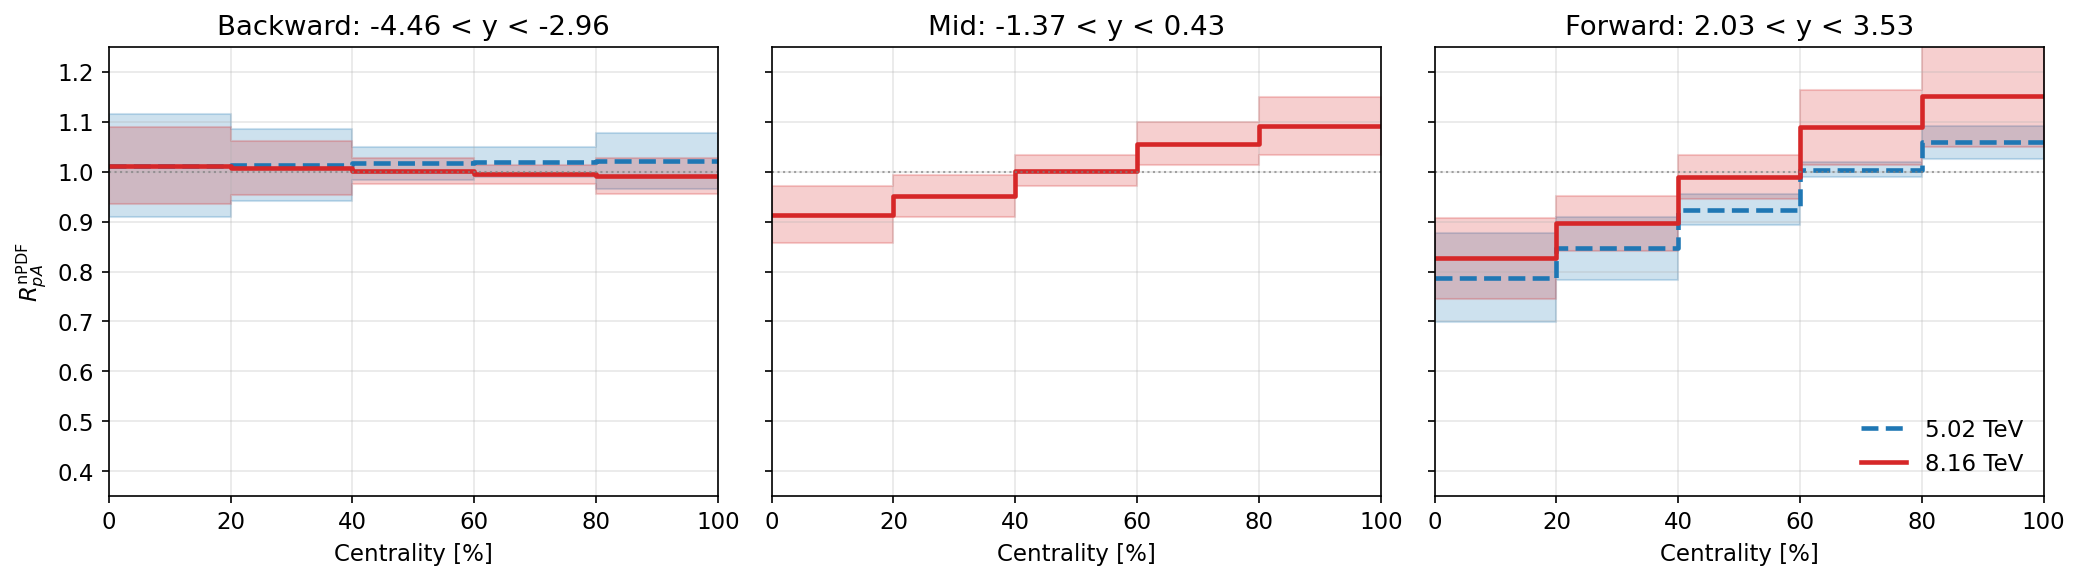

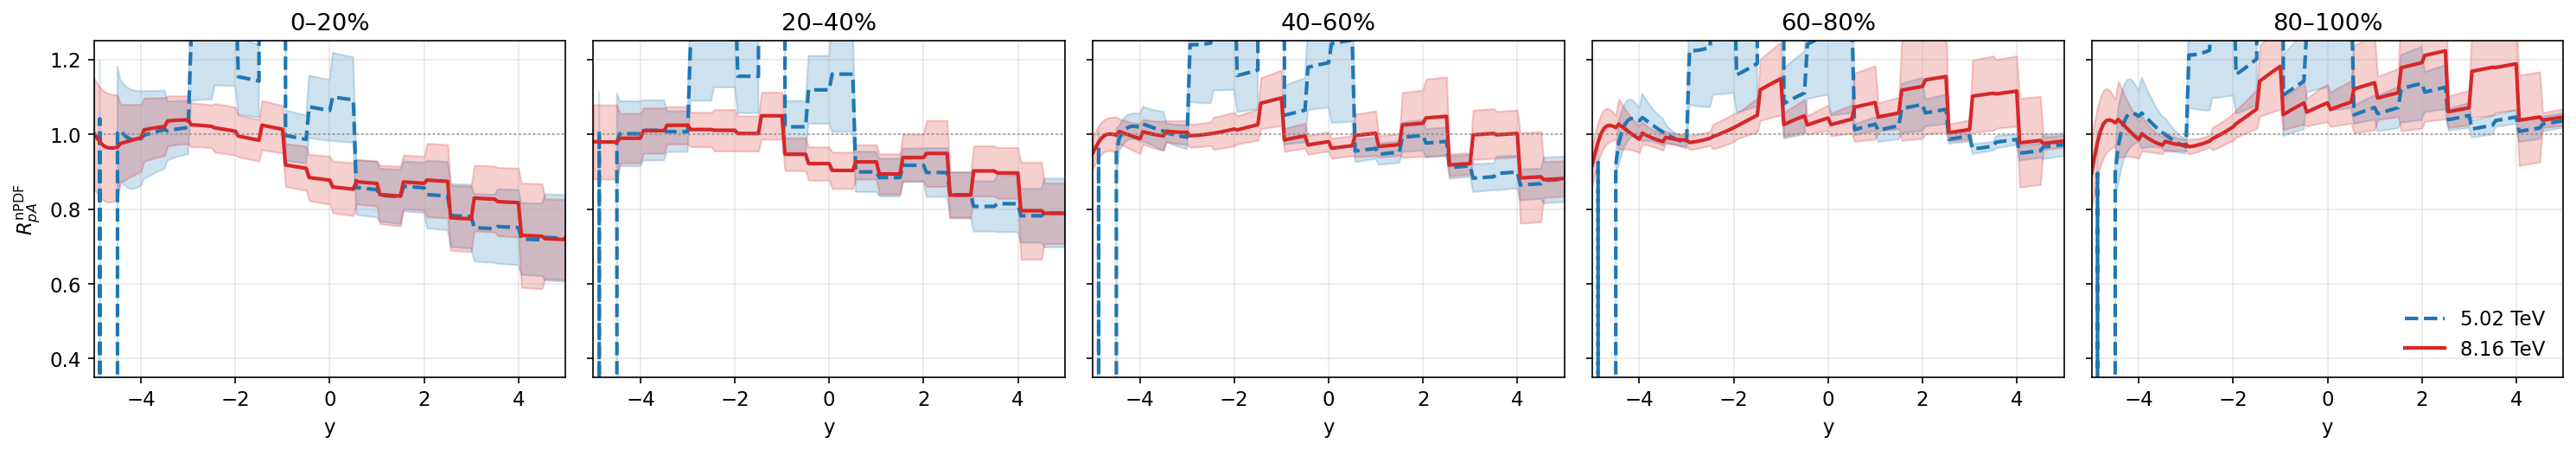

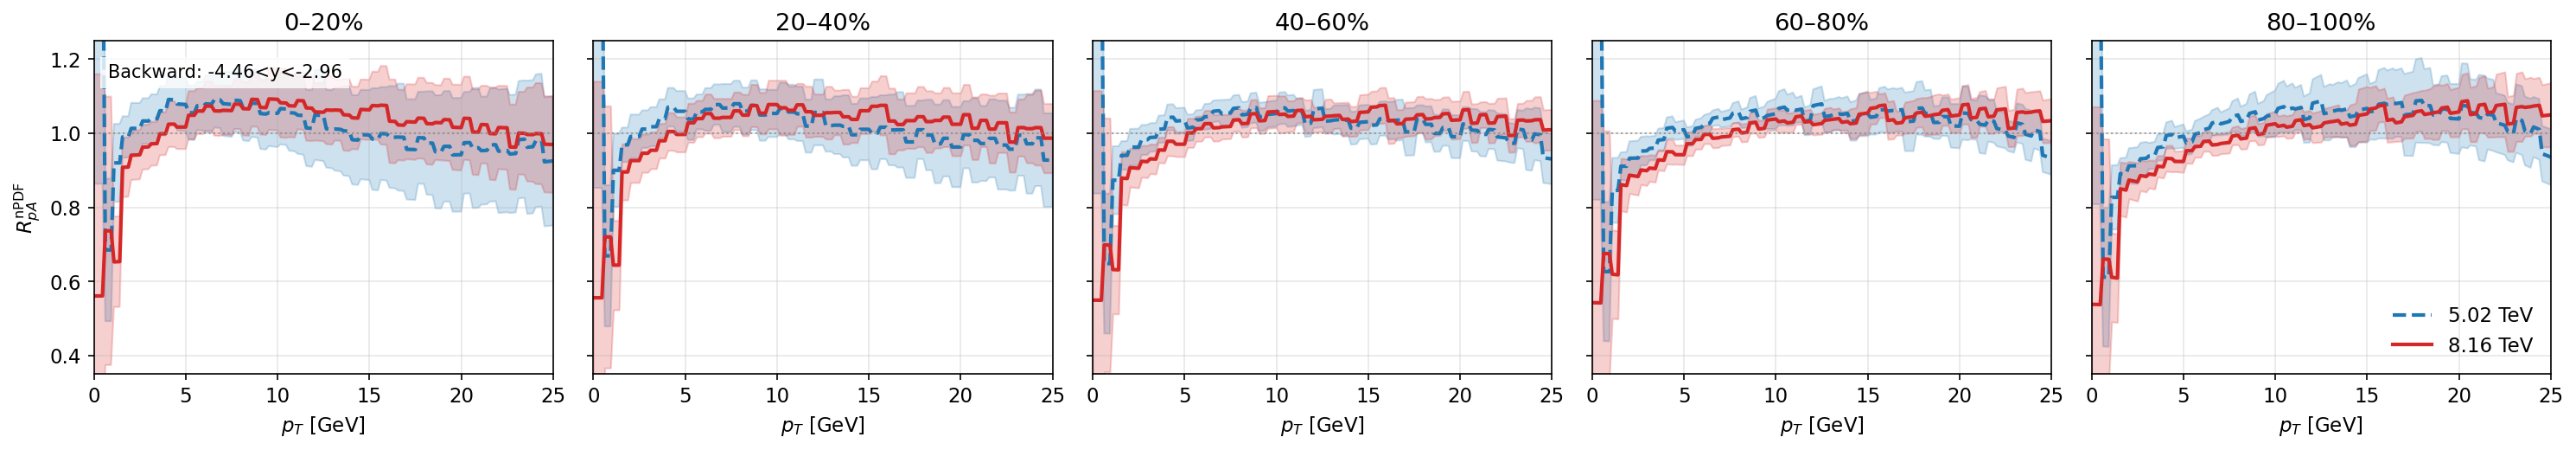

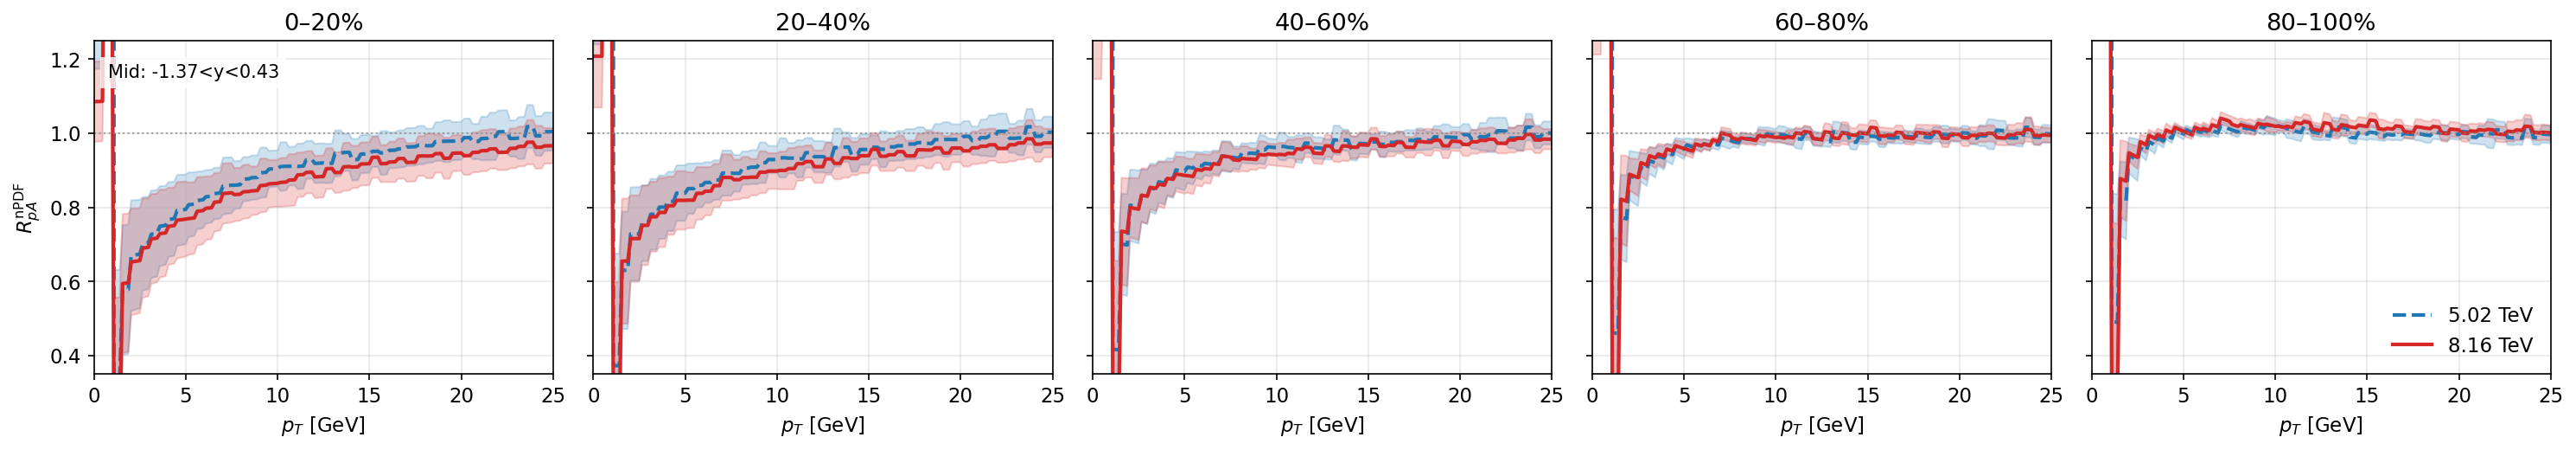

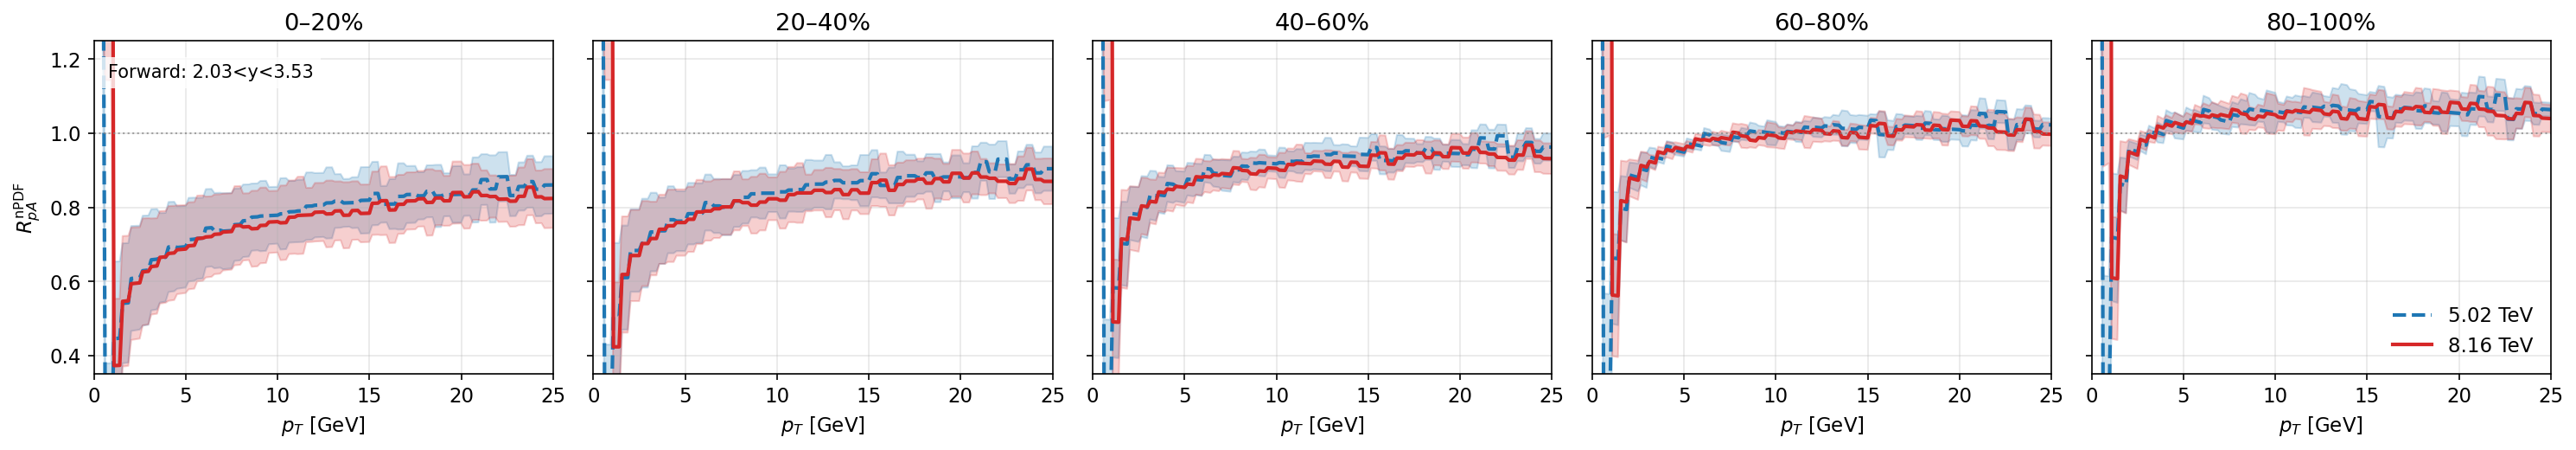

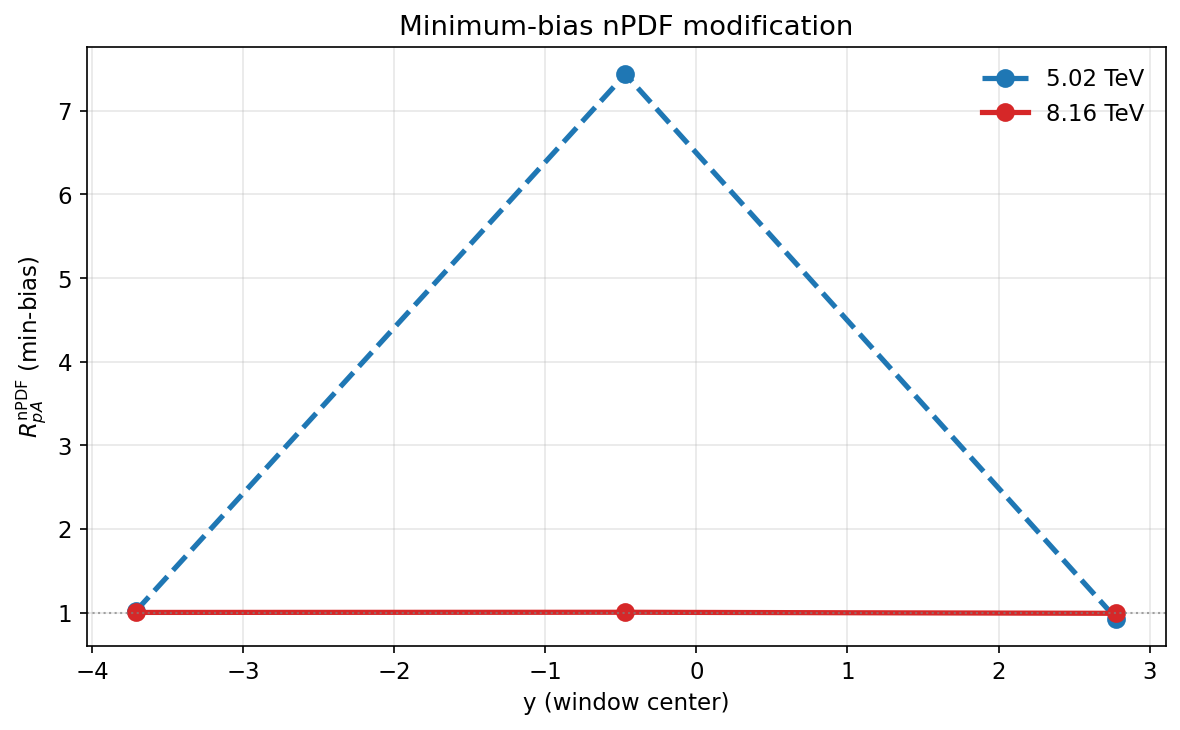

In [15]:
# ============================================================================
# RUN THE PIPELINE
# ============================================================================

if __name__ == "__main__":
    # Main analysis
    data = main()
    
    # Optional: additional analyses
    print("\n[OPTIONAL] Additional analyses...")
    
    # Summary statistics
    print_summary_statistics(data)
    
    # Min-bias comparison
    print("[Extra] Generating min-bias comparison plot...")
    plot_minbias_comparison(data)
    
    # Export binned results for forward rapidity
    print("\n[Extra] Exporting binned results...")
    df_binned = export_binned_results(data, y_window=(2.03, 3.53))
    print("\nSample of binned data:")
    print(df_binned.head(10))
    
    print("\n" + "="*70)
    print("ANALYSIS COMPLETE!")
    print("="*70)
    print(f"\nAll outputs saved to: {OUTDIR.absolute()}")
    print("\nTo recompute data, run:")
    print("  data = generate_all_data(force_recompute=True)")
    print("\n" + "="*70 + "\n")